In [202]:
import sqlite3
from pandas import DataFrame
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format

# Immoscout-scraper-analysis-and-other-magic
An end-to-end project which shows the gathering, analysis and prediction of housing data

## Still under construction

An end to end project which analyzes scraped data, predicts housing prices and recommends houses.

https://www.immobilienscout24.de/

Immobilienscout is the biggest German housing database with 7 million viewers and 2 billion views per Month

Im Dezember 2011 verschafften sich Hacker Zugriff auf Server von ImmobilienScout24 und damit auf Adress- und Kontaktdaten, Kundennummern und Namen sowohl von gewerblichen als auch privaten Anbietern.[24] 

For this project the following steps are being done:

 -Download data and transform it - done<br>
 -Analyze the data (Exporatory Data Analysis - EDA) - done<br>
 -Build a model to forecast housing prices - in progress<br>
 -Build a recommendation system - in progress<br>

We will start with the download and analysis of the data. Enjoy :)

# Data Load

In [280]:
conn = sqlite3.connect('XXX/Data_house_final_WV.db')  # You can create a new database by changing the name within the quotes  
c = conn.cursor()
c.execute('''SELECT * FROM HOUSINGDATA''')

In [281]:
df_full = DataFrame(c.fetchall(), columns=['Generated_index','Timestamp','URL', 'beschreibung', 'ga_cd_developer_virtualreality','ga_cd_application_requirements', 'ga_cd_customer_group', 'ga_cd_cxp_historicallisting', 'ga_cd_maillead_default_shown', 'ga_cd_via', 'ga_cd_via_qualified', 'geo_bln', 'geo_krs', 'geo_land', 'geo_plz', 'obj_ExclusiveExpose', 'obj_barrierFree', 'obj_buildingType', 'obj_cId', 'obj_cellar', 'obj_condition', 'obj_constructionPhase', 'obj_courtage', 'obj_cwId', 'obj_energyEfficiencyClass', 'obj_energyType', 'obj_firingTypes', 'obj_galleryAd', 'obj_groupnumber', 'obj_heatingType', 'obj_houseNumber', 'obj_immotype', 'obj_interiorQual', 'obj_international', 'obj_ityp', 'obj_lastRefurbish', 'obj_livingSpace', 'obj_livingSpaceRange', 'obj_lotArea', 'obj_newlyConst', 'obj_noParkSpaces', 'obj_noRooms', 'obj_noRoomsRange', 'obj_numberOfFloors', 'obj_objectnumber', 'obj_picture', 'obj_picturecount', 'obj_plotAreaRange', 'obj_pricetrend', 'obj_pricetrendbuy', 'obj_pricetrendrent', 'obj_purchasePrice', 'obj_purchasePriceRange', 'obj_project_id', 'obj_regio1', 'obj_regio2', 'obj_regio3', 'obj_rented', 'obj_scoutId', 'obj_street', 'obj_streetPlain', 'obj_telekomDownloadSpeed', 'obj_telekomHdTelephone', 'obj_telekomHybridDownloadSpeed', 'obj_telekomHybridUploadSpeed', 'obj_telekomInternet', 'obj_telekomInternetProductAvailable', 'obj_telekomInternetProductName', 'obj_telekomInternetServices', 'obj_telekomInternetTechnology', 'obj_telekomInternetType', 'obj_telekomInternetUrl', 'obj_telekomInternetUrlMobile', 'obj_telekomTrackingGroup', 'obj_telekomTvOffer', 'obj_telekomUploadSpeed', 'obj_thermalChar', 'obj_usableArea', 'obj_yearConstructed', 'obj_yearConstructedRange', 'obj_zipCode','evt_count_pm_sig','ga_cd_test_cxp_expose'])

In [282]:
df_full.head(10)

,Generated_index,Timestamp,URL,beschreibung,ga_cd_developer_virtualreality,ga_cd_application_requirements,ga_cd_customer_group,ga_cd_cxp_historicallisting,ga_cd_maillead_default_shown,ga_cd_via,...,obj_telekomTrackingGroup,obj_telekomTvOffer,obj_telekomUploadSpeed,obj_thermalChar,obj_usableArea,obj_yearConstructed,obj_yearConstructedRange,obj_zipCode,evt_count_pm_sig,ga_cd_test_cxp_expose
0,1,2019-09-06 08:40:59.977296,/expose/113387182,['Das im Jahr 1964 in massiver Bauweise erstel...,None,profile0,None,false,true,premium,...,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,104.40,80.00,1964.00,2.00,86836,None,None
1,2,2019-09-06 08:41:00.286271,/expose/113387183,['Man betritt das Haus über den Windfang mit a...,None,profile0,None,false,true,standard,...,telekom_layer_magenta_m,ONE_YEAR_FREE,10 MBit/s,200.20,nan,1975.00,3.00,40670,None,None
2,3,2019-09-06 08:41:00.682282,/expose/113387200,['Wohnen auf einer Ebene. Zum Verkauf steht ei...,None,profile0,None,false,true,standard,...,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,nan,90.00,1962.00,2.00,52525,None,None
3,4,2019-09-06 08:41:01.055295,/expose/113387161,"['Dieses hochwertige, teilunterkellerte Zweifa...",None,profile0,None,false,true,standard,...,None,None,None,139.80,50.00,1973.00,3.00,41468,None,None
4,5,2019-09-06 08:41:01.316270,/expose/113387138,['Nur einen Katzensprung von Neunkirchen entfe...,None,profile0,None,false,true,top,...,telekom_layer_magenta_s,NONE,"2,4 MBit/s",159.98,65.00,1994.00,5.00,66540,None,None
5,6,2019-09-06 08:41:01.526275,/expose/109658934,['Der o.a. Angebotspreis gilt für das Haus (ge...,None,profile0,home_builder,false,true,standard,...,None,None,None,nan,nan,2019.00,9.00,86459,None,None
6,7,2019-09-06 08:41:01.745280,/expose/111085050,['Generation 7: Zwei Traumhäuser in einem! Nut...,None,profile0,home_builder,false,true,standard,...,telekom_layer_magenta_s_hybrid,NONE,"2,4 MBit/s",nan,nan,nan,nan,86741,None,None
7,8,2019-09-06 08:41:01.978287,/expose/113387134,['Objektart:\tVierseithof bestehend aus 2 Wohn...,None,profile0,None,false,true,standard,...,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,543.48,640.00,1900.00,1.00,94121,None,None
8,9,2019-09-06 08:41:02.228290,/expose/113387103,['Wadgassen ist eine Gemeinde im Landkreis Saa...,None,profile0,None,false,true,top,...,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,nan,58.03,1955.00,2.00,66787,None,None
9,10,2019-09-06 08:41:02.462267,/expose/113387101,['Bous ist eine Gemeinde im Landkreis Saarloui...,None,profile0,None,false,true,top,...,telekom_layer_magenta_l,ONE_YEAR_FREE,40 MBit/s,116.50,56.63,1973.00,3.00,66359,None,None


The database has been loaded into the notebook.

# Data preperation

In [301]:
df_full.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106147 entries, 0 to 106146
Data columns (total 83 columns):
Generated_index                        106147 non-null int64
Timestamp                              106147 non-null datetime64[ns]
URL                                    106147 non-null object
beschreibung                           106147 non-null object
ga_cd_developer_virtualreality         2338 non-null object
ga_cd_application_requirements         106147 non-null object
ga_cd_customer_group                   13769 non-null object
ga_cd_cxp_historicallisting            106146 non-null object
ga_cd_maillead_default_shown           106147 non-null object
ga_cd_via                              106147 non-null object
ga_cd_via_qualified                    6657 non-null object
geo_bln                                106147 non-null object
geo_krs                                106147 non-null object
geo_land                               106147 non-null object
geo_plz            

In [302]:
#Change to time
df_full.Timestamp = pd.to_datetime(df_full.Timestamp)
df_full.Timestamp.dtypes

dtype('<M8[ns]')

In [303]:
df_full.shape

(106147, 83)

In [304]:
#Change of categorical variables to TRUE and FALSE
for i in df_full:
    x=df_full[i].value_counts()
    if len(x)==2:
        print(x)
        print("="*50)

profile0                     106046
profile1_customersettings       101
Name: ga_cd_application_requirements, dtype: int64
false    106145
true          1
Name: ga_cd_cxp_historicallisting, dtype: int64
false    75970
true     30021
Name: obj_ExclusiveExpose, dtype: int64
n    100655
y      5492
Name: obj_barrierFree, dtype: int64
n    62595
y    43552
Name: obj_cellar, dtype: int64
y    69194
n    35159
Name: obj_courtage, dtype: int64
3,active        106146
103,inactive         1
Name: obj_ityp, dtype: int64
n    90168
y    15979
Name: obj_newlyConst, dtype: int64
n    99153
y     6994
Name: obj_rented, dtype: int64
true     83054
false       20
Name: obj_telekomHdTelephone, dtype: int64
true     83074
false    10880
Name: obj_telekomInternetProductAvailable, dtype: int64


In [305]:
df_full.obj_ExclusiveExpose = df_full.obj_ExclusiveExpose.replace("n",False).replace("y",True)
df_full.obj_barrierFree = df_full.obj_barrierFree.replace("n",False).replace("y",True)
df_full.obj_cellar = df_full.obj_cellar.replace("n",False).replace("y",True)
df_full.obj_courtage = df_full.obj_courtage.replace("n",False).replace("y",True)
df_full.obj_newlyConst = df_full.obj_newlyConst.replace("n",False).replace("y",True)
df_full.obj_rented = df_full.obj_rented.replace("n",False).replace("y",True)
df_full.obj_telekomHdTelephone = df_full.obj_telekomHdTelephone.replace("n",False).replace("y",True)
df_full.obj_telekomInternetProductAvailable = df_full.obj_telekomInternetProductAvailable.replace("n",False).replace("y",True)

In [306]:
for i in df_full:
    x=df_full[i].value_counts()
    if len(x)==2:
        print(x)
        print("="*50)

profile0                     106046
profile1_customersettings       101
Name: ga_cd_application_requirements, dtype: int64
false    106145
true          1
Name: ga_cd_cxp_historicallisting, dtype: int64
false    75970
true     30021
Name: obj_ExclusiveExpose, dtype: int64
False    100655
True       5492
Name: obj_barrierFree, dtype: int64
False    62595
True     43552
Name: obj_cellar, dtype: int64
True     69194
False    35159
Name: obj_courtage, dtype: int64
3,active        106146
103,inactive         1
Name: obj_ityp, dtype: int64
False    90168
True     15979
Name: obj_newlyConst, dtype: int64
False    99153
True      6994
Name: obj_rented, dtype: int64
true     83054
false       20
Name: obj_telekomHdTelephone, dtype: int64
true     83074
false    10880
Name: obj_telekomInternetProductAvailable, dtype: int64


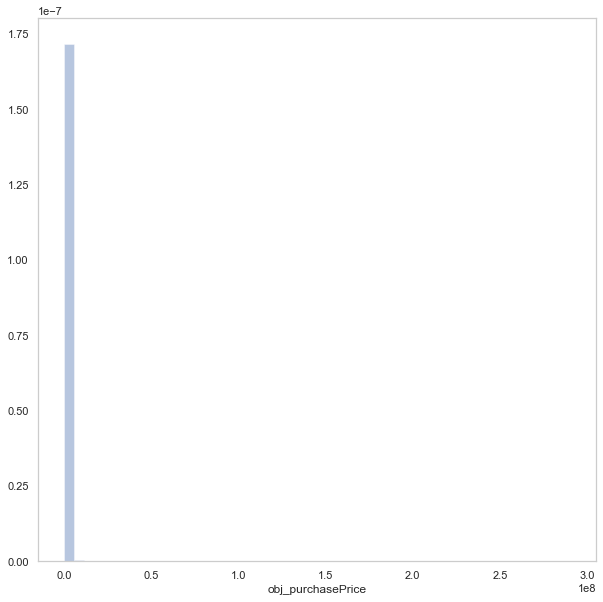

In [307]:
ax = sns.distplot(df_full['obj_purchasePrice'])
sns.set(rc={'figure.figsize':(10,10)})

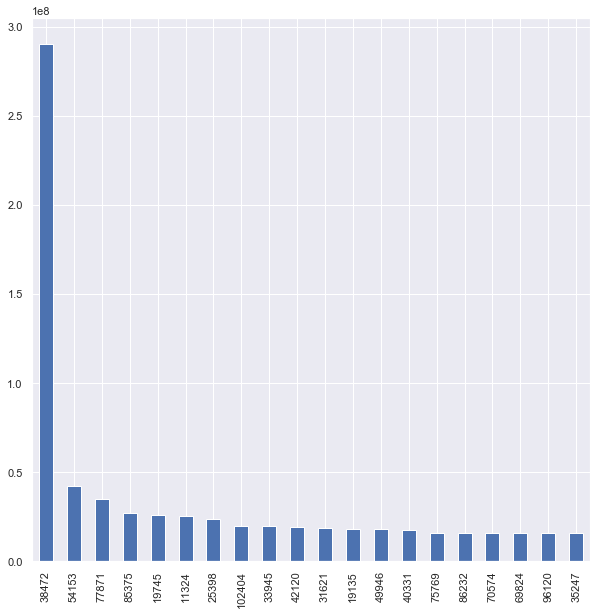

In [308]:
df_full.obj_purchasePrice.sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

In [309]:
df_full.iloc[38472,:][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_balcony", "obj_cellar",
                      "obj_condition", "URL", "obj_floor", "obj_garden",
                      "obj_hasKitchen", "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                      "obj_lift", "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", "obj_totalRent", 
                      "obj_typeOfFlat", "obj_yearConstructed", "index", "obj_purchasePrice"]]

beschreibung           ['DHH   mit Keller EINZUGSBEREIT  !\n\nDiese h...
geo_bln                                                Baden_Württemberg
geo_krs                                                  Göppingen_Kreis
geo_plz                                                            73098
obj_balcony                                                          NaN
obj_cellar                                                          True
obj_condition                                             first_time_use
URL                                                    /expose/111749859
obj_floor                                                            NaN
obj_garden                                                           NaN
obj_hasKitchen                                                       NaN
obj_heatingType                                                heat_pump
obj_interiorQual                                                  normal
obj_lastRefurbish                                  

There is a house with a very high price. This is an outlier and will be removed.

In [310]:
df_full.iloc[54153,:][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_balcony", "obj_cellar",
                      "obj_condition", "URL", "obj_floor", "obj_garden",
                      "obj_hasKitchen", "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                      "obj_lift", "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", "obj_totalRent", 
                      "obj_typeOfFlat", "obj_yearConstructed", "index", "obj_purchasePrice"]]

beschreibung           ['Vierseitgutshof in unvergleichlicher Weitbli...
geo_bln                                                           Bayern
geo_krs                                    Bad_Tölz_Wolfratshausen_Kreis
geo_plz                                                            82541
obj_balcony                                                          NaN
obj_cellar                                                         False
obj_condition                                             no_information
URL                                                    /expose/107736753
obj_floor                                                            NaN
obj_garden                                                           NaN
obj_hasKitchen                                                       NaN
obj_heatingType                                                     None
obj_interiorQual                                          no_information
obj_lastRefurbish                                  

In [311]:
df_full = df_full[df_full.URL != '/expose/111749859']
sum(df_full.URL=='/expose/111749859')

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\pandas\core\ops.py:1649: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


0

In [312]:
sum(df_full.obj_purchasePrice==0)

272

In [313]:
df_full = df_full[df_full.obj_purchasePrice != 0]
sum(df_full.obj_purchasePrice==0)

0

We remove the zero values as well.

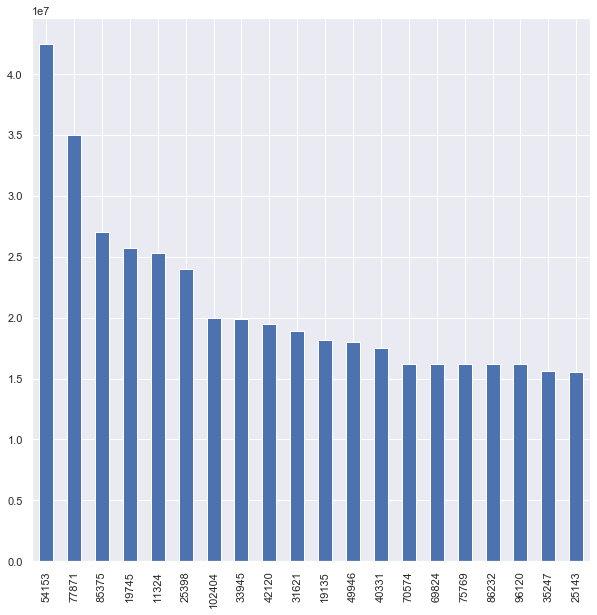

In [314]:
df_full.obj_purchasePrice.sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

In [315]:
sum(df_full.obj_purchasePrice <= 10000)

286

And the ones which are less than 10,000€

In [316]:
df_full.shape

(105874, 83)

In [317]:
df_full = df_full[df_full.obj_purchasePrice > 10000]
sum(df_full.obj_purchasePrice <= 10000)

0

In [318]:
df_full.shape

(105588, 83)

In [319]:
df_full['word_count'] = df_full['beschreibung'].apply(lambda x: len(str(x).split(" ")))
df_full[['word_count','beschreibung']].head()

,word_count,beschreibung
0,249,['Das im Jahr 1964 in massiver Bauweise erstel...
1,431,['Man betritt das Haus über den Windfang mit a...
2,240,['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3,382,"['Dieses hochwertige, teilunterkellerte Zweifa..."
4,242,['Nur einen Katzensprung von Neunkirchen entfe...


In [320]:
df_full['word_count_upper'] = df_full['beschreibung'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
df_full[['word_count_upper','beschreibung']].head()

,word_count_upper,beschreibung
0,5,['Das im Jahr 1964 in massiver Bauweise erstel...
1,1,['Man betritt das Haus über den Windfang mit a...
2,3,['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3,3,"['Dieses hochwertige, teilunterkellerte Zweifa..."
4,4,['Nur einen Katzensprung von Neunkirchen entfe...


In [321]:
df_full['beschreibung_length'] = df_full['beschreibung'].str.len() ## this also includes spaces
df_full[['beschreibung_length','beschreibung']].head()

,beschreibung_length,beschreibung
0,1948,['Das im Jahr 1964 in massiver Bauweise erstel...
1,3166,['Man betritt das Haus über den Windfang mit a...
2,1838,['Wohnen auf einer Ebene. Zum Verkauf steht ei...
3,3334,"['Dieses hochwertige, teilunterkellerte Zweifa..."
4,1930,['Nur einen Katzensprung von Neunkirchen entfe...


In [322]:
df_full['price_per_m²_living'] = df_full['obj_purchasePrice'] / df_full['obj_livingSpace'] 
df_full['price_per_m²_living'] = df_full['price_per_m²_living'].replace(np.inf, np.nan)
df_full['price_per_m²_property'] = df_full['obj_purchasePrice'] / df_full['obj_lotArea'] 
df_full['price_per_m²_property'] = df_full['price_per_m²_property'].replace(np.inf, np.nan)

Above we added some measures: Word count, word count upper, length of text, price per m² living and property

In [323]:
df_full.obj_zipCode = df_full.obj_zipCode.astype(str)
df_full.geo_plz = df_full.geo_plz.astype(str)
df_full.obj_cId = df_full.obj_cId.astype(str)
df_full.obj_scoutId = df_full.obj_scoutId.astype(str)

In [324]:
plz = pd.ExcelFile("plz-5stellig-daten.xlsx").parse(0)
plz.plz = plz.plz.astype(int)
plz.plz = plz.plz.astype(str)
df_full = df_full.merge(plz[["plz","qkm","einwohner"]],left_on="geo_plz",right_on="plz",how="left")
df_full["bev_pro_km2"] = df_full.einwohner/df_full.qkm

In [325]:
geo = pd.read_csv("DE.tab",sep="\t")
geo_split = pd.concat([geo.lat,geo.lon,geo.plz.str.split(",",expand=True)],axis=1)
geo_split_melt = geo_split.melt(id_vars=["lat","lon"],value_name="plz").drop("variable",axis=1)
geo_split_melt = geo_split_melt.loc[geo_split_melt.plz.isnull()==0]
geo_split_melt = geo_split_melt.loc[geo_split_melt.plz!=""]
geo_split_melt.plz = geo_split_melt.plz.astype(int)
geo_split_melt.plz = geo_split_melt.plz.astype(str)
geo_split_melt_grouped = geo_split_melt.groupby("plz").agg({"lat":["mean"],"lon":["mean"]}).reset_index()
geo_split_melt_grouped.columns = geo_split_melt_grouped.columns.get_level_values(0)
df_full = df_full.merge(geo_split_melt_grouped[["plz","lat","lon"]],left_on="geo_plz",right_on="plz",how="left")

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We added the PLZ and Lat lon data. Also we added the amount of capita per km²

In [326]:
df_full.obj_ExclusiveExpose = df_full.obj_ExclusiveExpose.astype(str)
df_full.obj_telekomDownloadSpeed = df_full.obj_telekomDownloadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomHybridDownloadSpeed = df_full.obj_telekomHybridDownloadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomHybridUploadSpeed = df_full.obj_telekomHybridUploadSpeed.str.replace(" MBit/s","").astype(float)
df_full.obj_telekomUploadSpeed = df_full.obj_telekomUploadSpeed.str.replace(" MBit/s","").str.replace(",",".").astype(float)
df_full.obj_telekomInternet = df_full.obj_telekomInternet.str.replace(" MBit/s","").str.replace(" kBit/s","")
df_full.obj_telekomInternet = df_full.obj_telekomInternet.astype(float)
df_full.obj_telekomHdTelephone = (df_full.obj_telekomHdTelephone*1).fillna(0)
df_full.obj_telekomInternetProductAvailable = (df_full.obj_telekomInternetProductAvailable*1).fillna(0)

In [327]:
df_full.drop(columns =["plz_x"], inplace = True) 
df_full.drop(columns =["plz_y"], inplace = True) 

In [328]:
df_full['obj_firingTypes'] = df_full['obj_firingTypes'].str.split(":", n = 1, expand = True)[0]

Some more information for example internet speed and firing types fixed.

In [329]:
df_full.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 105588 entries, 0 to 105587
Data columns (total 93 columns):
Generated_index                        105588 non-null int64
Timestamp                              105588 non-null datetime64[ns]
URL                                    105588 non-null object
beschreibung                           105588 non-null object
ga_cd_developer_virtualreality         2323 non-null object
ga_cd_application_requirements         105588 non-null object
ga_cd_customer_group                   13751 non-null object
ga_cd_cxp_historicallisting            105587 non-null object
ga_cd_maillead_default_shown           105588 non-null object
ga_cd_via                              105588 non-null object
ga_cd_via_qualified                    6635 non-null object
geo_bln                                105588 non-null object
geo_krs                                105588 non-null object
geo_land                               105588 non-null object
geo_plz            

# Exploratory Data Analysis

## Location

In [40]:
grouped = df_full.groupby('geo_bln').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_bln').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_bln','URL']], left_on='geo_bln', right_on='geo_bln')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,geo_bln,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Nordrhein_Westfalen,472173.20,207.68,1363.59,2.39,6.89,2.20,14.86,4.23,157.88,...,2009.99,1968.54,369.40,4.45,2896.50,2510.32,4229.58,71.92,1170.35,18927
1,Bayern,718431.86,236.10,1354.56,2.42,6.46,2.39,15.09,4.14,138.91,...,2009.98,1977.59,360.60,5.24,2862.90,3994.74,2011.77,78.27,604.18,13814
2,Niedersachsen,345419.79,193.99,1752.78,2.40,6.58,1.96,15.01,4.01,157.90,...,2010.34,1967.84,353.25,4.25,2753.70,2219.86,1276.38,58.16,385.42,12526
3,Baden_Württemberg,600091.72,203.28,1213.87,2.59,7.16,2.51,14.59,4.52,154.39,...,2009.20,1968.97,329.70,4.12,2581.47,3170.28,1711.21,71.26,620.91,11994
4,Rheinland_Pfalz,336265.40,265.25,1336.98,2.65,6.66,2.22,15.15,3.63,163.22,...,2009.59,1962.71,334.37,4.11,2639.37,2120.91,830.96,60.62,374.89,9262
5,Hessen,574048.79,235.15,1009.75,2.58,7.12,2.39,13.92,2.91,160.80,...,2008.57,1962.91,362.22,5.01,2852.62,3018.66,1723.40,72.88,652.32,8750
6,Schleswig_Holstein,501977.81,172.69,1995.29,2.32,5.84,2.04,15.47,4.86,151.54,...,2010.53,1971.03,382.35,6.05,2950.64,2970.53,933.77,72.35,440.43,5666
7,Sachsen,304724.94,245.58,1604.45,2.80,8.27,2.22,12.92,5.17,154.03,...,2004.40,1946.06,329.02,3.72,2593.27,4319.39,541.88,67.41,485.52,5434
8,Brandenburg,420853.58,195.00,1897.15,2.65,6.42,1.98,13.07,7.11,139.44,...,2009.61,1969.05,359.90,3.96,2800.52,2687.64,561.81,70.69,307.45,5007
9,Sachsen_Anhalt,215591.94,212.45,1473.49,2.85,7.49,1.99,13.25,1.75,163.48,...,2006.99,1944.76,299.63,3.45,2345.44,1146.42,409.38,61.54,277.77,3421


A first glance at the data. Berlin and Hamburg have the most expensive houses, Sachsen-Anhalt and Thüringen the cheapest.

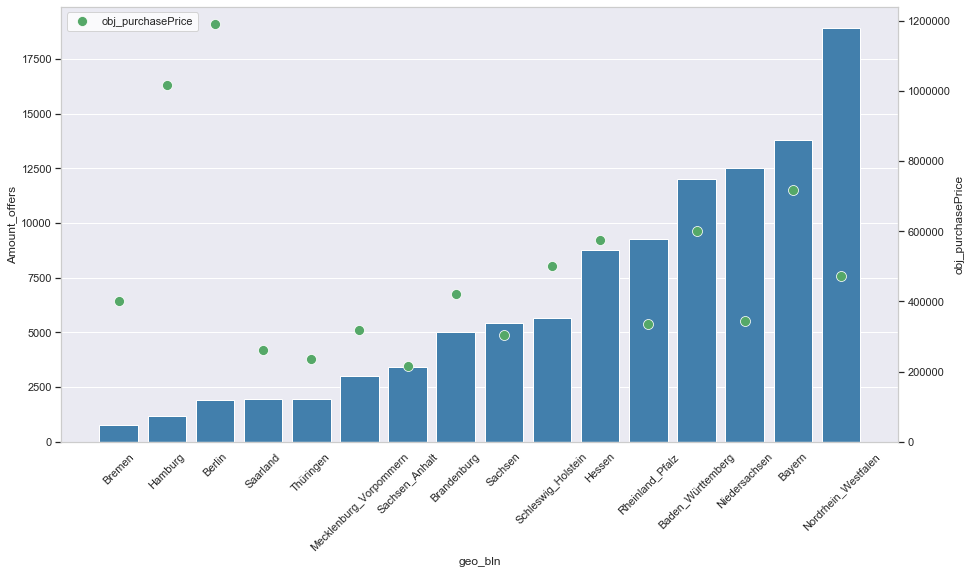

In [41]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('Amount_offers')
ax= sns.barplot(x = 'geo_bln', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Amount of offers and average price
Nordrhein Westfalen has the most offers in the database. Bremen has the fewest. Looking at average price and amount of offers shows that Bavaria is the highest. 

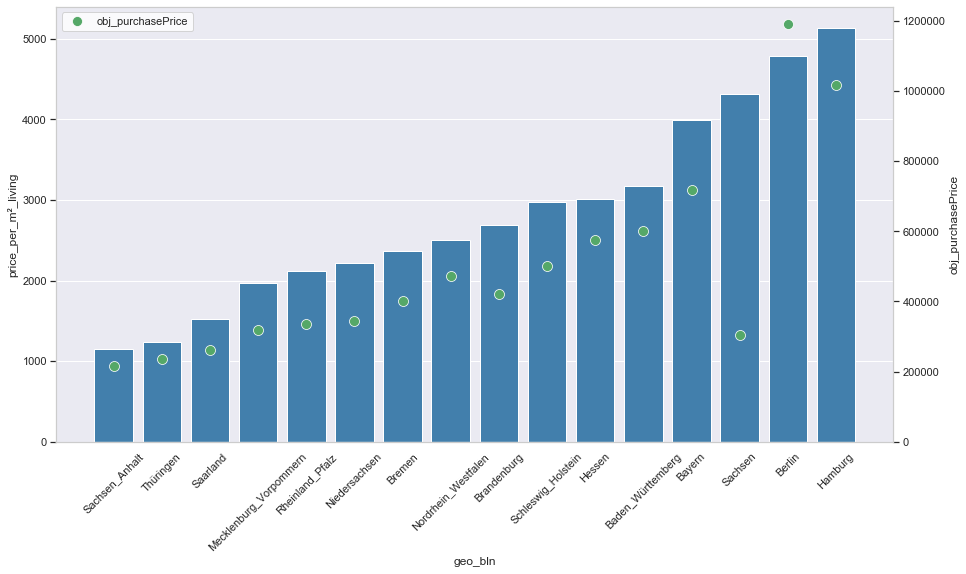

In [42]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'geo_bln', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Price per living m² and average price

Hamburg has the highest price per m². Interesting is Saxony, the price per m² is unexpectly high. Lowest county is Sachsen-Anhalt with 1,000 per m² and an average price of 215 KEUR.

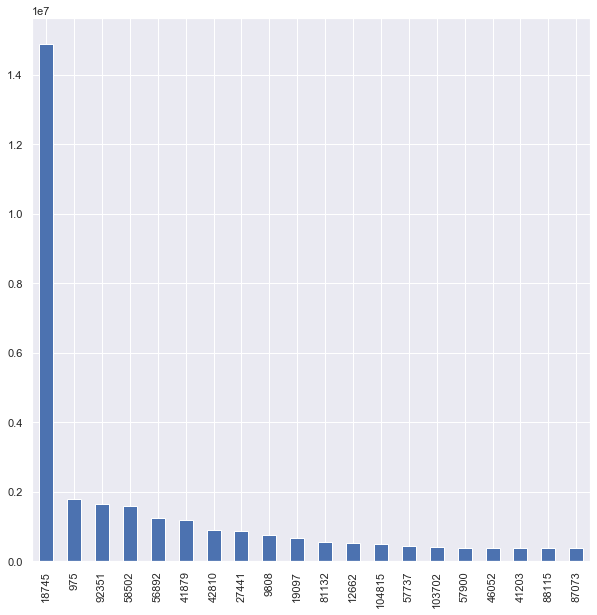

In [330]:
df_full['price_per_m²_living'].sort_values(ascending=False)[:20].plot(kind="bar")
plt.show()

In [331]:
df_full.iloc[18745,:][["beschreibung", "geo_bln", "geo_krs",
                      "geo_plz", "obj_balcony", "obj_cellar",
                      "obj_condition", "URL", "obj_floor", "obj_garden",
                      "obj_hasKitchen", "obj_heatingType",
                      "obj_interiorQual", "obj_lastRefurbish",
                      "obj_lift", "obj_livingSpace", 
                      "obj_newlyConst", "obj_noParkSpaces", 
                      "obj_noRooms", "obj_totalRent", 
                      "obj_typeOfFlat", "obj_yearConstructed", "index", "obj_purchasePrice"]]

beschreibung           ['Der Gasthof ist sehr beliebt und über die Gr...
geo_bln                                                          Sachsen
geo_krs                                                    Vogtlandkreis
geo_plz                                                             8606
obj_balcony                                                          NaN
obj_cellar                                                         False
obj_condition                                                  well_kept
URL                                                    /expose/112952906
obj_floor                                                            NaN
obj_garden                                                           NaN
obj_hasKitchen                                                       NaN
obj_heatingType                                          central_heating
obj_interiorQual                                                  normal
obj_lastRefurbish                                  

In [332]:
df_full = df_full[df_full.URL != '/expose/112952906']
sum(df_full.URL=='/expose/112952906')

0

## ↑ Mistake has been found and removed. A house with a obj_livingSpace of 0.01

In [333]:
grouped = df_full.groupby('geo_bln').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_bln').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_bln','URL']], left_on='geo_bln', right_on='geo_bln')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,geo_bln,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Nordrhein_Westfalen,472173.20,207.68,1363.59,2.39,6.89,2.20,14.86,4.23,157.88,...,2009.99,1968.54,369.40,4.45,2896.50,2510.32,4229.58,71.92,1170.35,18927
1,Bayern,718431.86,236.10,1354.56,2.42,6.46,2.39,15.09,4.14,138.91,...,2009.98,1977.59,360.60,5.24,2862.90,3994.74,2011.77,78.27,604.18,13814
2,Niedersachsen,345419.79,193.99,1752.78,2.40,6.58,1.96,15.01,4.01,157.90,...,2010.34,1967.84,353.25,4.25,2753.70,2219.86,1276.38,58.16,385.42,12526
3,Baden_Württemberg,600091.72,203.28,1213.87,2.59,7.16,2.51,14.59,4.52,154.39,...,2009.20,1968.97,329.70,4.12,2581.47,3170.28,1711.21,71.26,620.91,11994
4,Rheinland_Pfalz,336265.40,265.25,1336.98,2.65,6.66,2.22,15.15,3.63,163.22,...,2009.59,1962.71,334.37,4.11,2639.37,2120.91,830.96,60.62,374.89,9262
5,Hessen,574048.79,235.15,1009.75,2.58,7.12,2.39,13.92,2.91,160.80,...,2008.57,1962.91,362.22,5.01,2852.62,3018.66,1723.40,72.88,652.32,8750
6,Schleswig_Holstein,501977.81,172.69,1995.29,2.32,5.84,2.04,15.47,4.86,151.54,...,2010.53,1971.03,382.35,6.05,2950.64,2970.53,933.77,72.35,440.43,5666
7,Sachsen,304753.60,245.63,1604.41,2.78,8.27,2.22,12.92,5.17,153.85,...,2004.39,1946.09,329.03,3.72,2593.36,1574.15,541.97,67.40,485.59,5433
8,Brandenburg,420853.58,195.00,1897.15,2.65,6.42,1.98,13.07,7.11,139.44,...,2009.61,1969.05,359.90,3.96,2800.52,2687.64,561.81,70.69,307.45,5007
9,Sachsen_Anhalt,215591.94,212.45,1473.49,2.85,7.49,1.99,13.25,1.75,163.48,...,2006.99,1944.76,299.63,3.45,2345.44,1146.42,409.38,61.54,277.77,3421


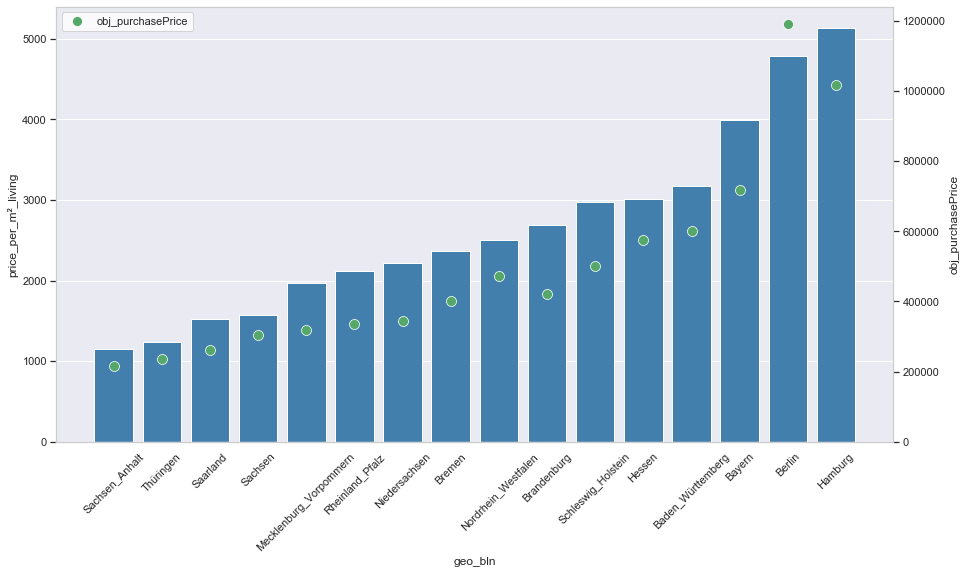

In [334]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'geo_bln', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ That looks better :D. A good case for the importance of a proper EDA.

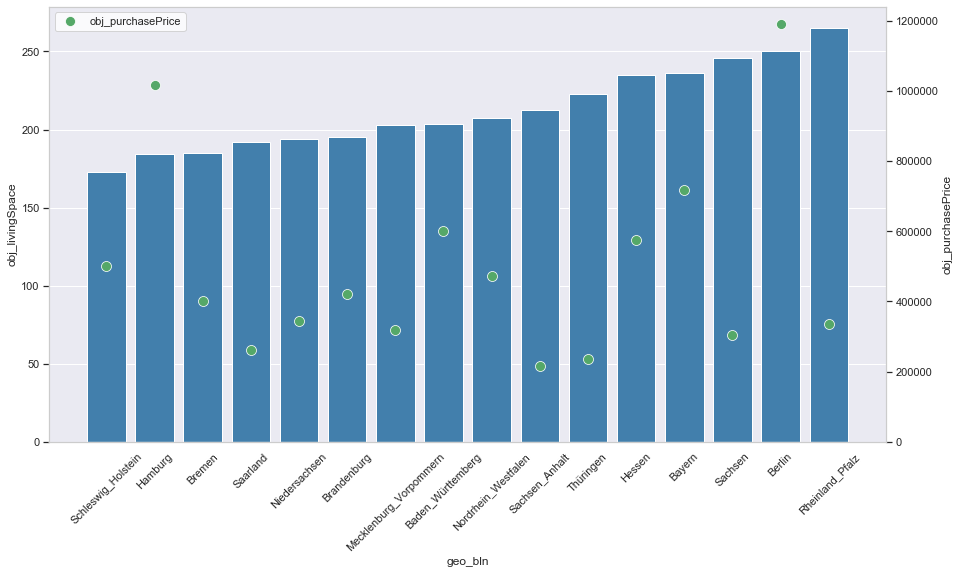

In [45]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_livingSpace')
ax= sns.barplot(x = 'geo_bln', y = 'obj_livingSpace',  label='obj_livingSpace', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Living space and average price

Rheinland Pfalz has the biggest houses, Schleswig Holstein the smallest.

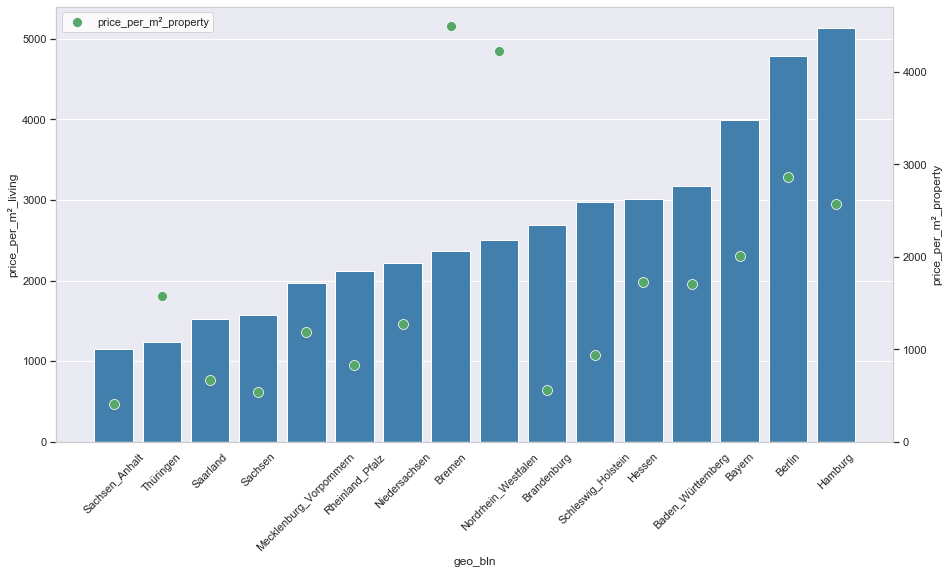

In [335]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('price_per_m²_living')
ax= sns.barplot(x = 'geo_bln', y = 'price_per_m²_living',  label='price_per_m²_living', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'price_per_m²_property', marker="o",  label='price_per_m²_property', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Price per m² living and price per m² property

Hamburg and Berlin are the most expensive cities. Sachsen-Anhalt and Thüringen are the cheapest.

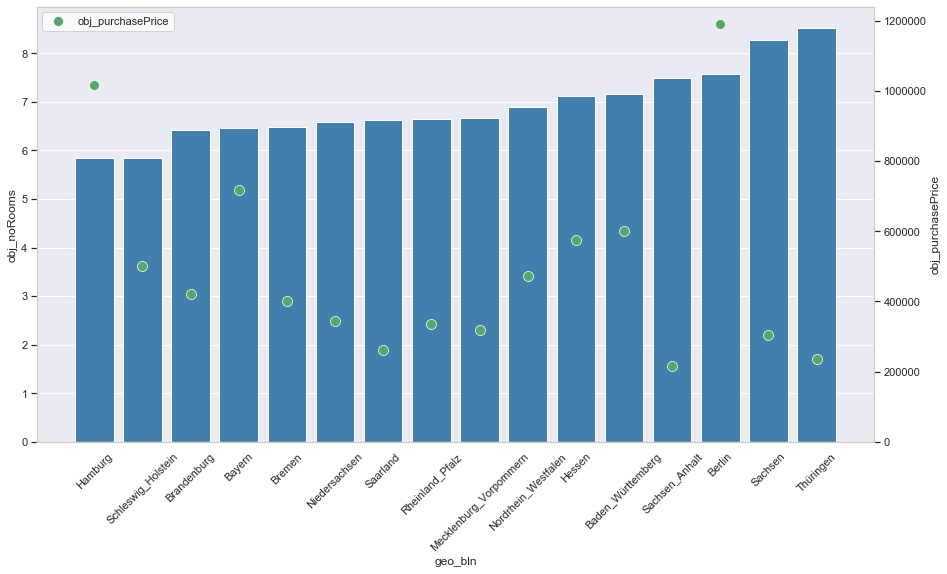

In [47]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_noRooms')
ax= sns.barplot(x = 'geo_bln', y = 'obj_noRooms',  label='obj_noRooms', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average number of rooms and average price

In Thüringen you get most rooms for your money. Hamburg has the smallest amount of rooms per house.

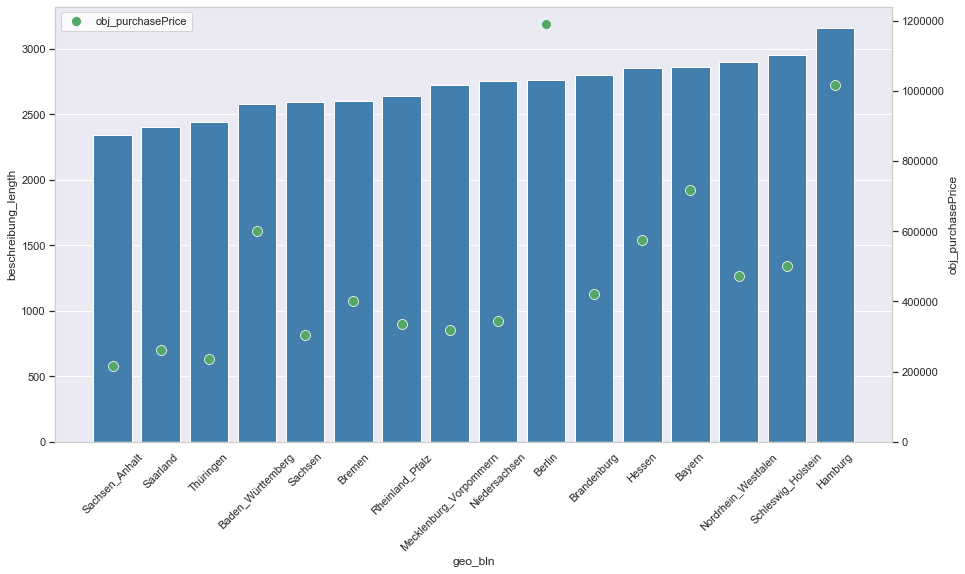

In [48]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('beschreibung_length')
ax= sns.barplot(x = 'geo_bln', y = 'beschreibung_length',  label='beschreibung_length', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average length of description text and average price

People in Hamburg seem to write the longest texts. Berlin is in the upper half. Sachsen-Anhalt has the shortest texts per Expose.

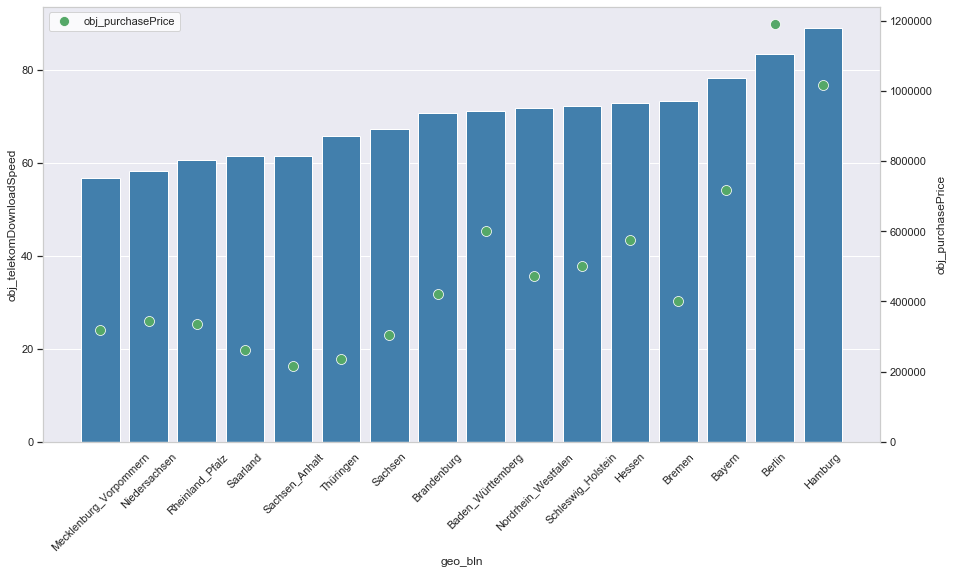

In [49]:
sns.set(font_scale = 2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 0, 'lines.markersize': 10})
plt.figure(figsize=(15,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_telekomDownloadSpeed')
ax= sns.barplot(x = 'geo_bln', y = 'obj_telekomDownloadSpeed',  label='obj_telekomDownloadSpeed', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'geo_bln', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
plt.show()

## ↑ Average download speed and average price

Fastest internet is being offered in Hamburg and Berlin. Mecklenburg-Vorpommern and Niedersachsen have the slowest.

In [336]:
grouped = df_full.groupby('geo_krs').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_krs').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_krs','URL']], left_on='geo_krs', right_on='geo_krs')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_purchasePrice', ascending=False).reset_index(drop="True")
grouped.head(10)

,geo_krs,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Miesbach_Kreis,1867617.70,244.75,2603.76,2.76,7.48,2.38,11.74,4.43,135.50,...,2012.62,1980.03,311.34,4.14,2418.65,7242.74,2124.00,81.15,171.51,133
1,München,1820457.50,194.53,431.70,1.50,6.09,2.81,12.47,4.23,107.69,...,2009.46,1991.26,422.13,6.28,3325.98,9172.48,11805.28,88.82,4050.94,697
2,Frankfurt_am_Main,1820394.81,331.20,523.01,2.77,11.34,2.90,11.23,3.58,149.99,...,2009.91,1965.16,372.06,5.41,2927.66,6720.06,7362.04,86.72,3467.56,373
3,Heidelberg,1817992.84,297.56,659.54,2.79,10.09,3.04,15.33,19.07,160.32,...,2009.00,1951.60,367.60,3.91,2843.64,5945.84,4208.44,22.42,1516.79,70
4,Starnberg_Kreis,1770981.52,211.01,2192.49,2.12,6.17,2.57,12.94,3.64,105.19,...,2011.49,1994.36,417.26,6.37,3302.87,8221.13,2870.47,84.98,309.92,355
5,Bad_Tölz_Wolfratshausen_Kreis,1743170.07,234.43,1356.74,2.25,6.61,2.61,15.60,2.10,118.37,...,2011.25,1983.52,385.18,4.21,2987.79,6761.42,2357.45,63.63,491.48,151
6,Düsseldorf,1714156.28,346.33,980.30,2.26,10.10,2.62,14.55,5.43,169.45,...,2009.75,1963.75,399.51,5.66,3125.19,5370.01,3376.07,77.69,3681.05,299
7,München_Kreis,1677493.15,191.47,523.17,1.81,5.75,2.60,14.11,4.32,119.46,...,2013.00,1994.10,434.45,5.98,3463.62,8337.47,3463.69,83.54,1108.87,410
8,Baden_Baden,1600177.43,314.55,1233.54,2.54,8.40,2.77,13.25,10.18,127.41,...,2010.40,1957.13,324.54,2.84,2562.20,4675.16,1962.24,95.65,510.33,107
9,Garmisch_Partenkirchen_Kreis,1425879.58,277.91,1380.45,3.06,8.63,2.33,16.58,0.80,147.59,...,2010.13,1962.52,430.11,5.31,3327.70,5756.65,9952.10,92.57,112.37,71


## ↑ The most expensive 10 places in Germany to live

Miesbach (Tegernsee), Munich, Frankfurt (Main) are the most expensive with an average price of 1.8 MEUR. 

In [51]:
grouped = df_full.groupby('geo_krs').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('geo_krs').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['geo_krs','URL']], left_on='geo_krs', right_on='geo_krs')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_purchasePrice', ascending=True).reset_index(drop="True")
grouped.head(10)

,geo_krs,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Kyffhäuserkreis,72955.46,178.63,1002.38,2.00,6.25,2.10,10.38,2.26,212.32,...,2003.92,1910.65,213.89,4.93,1728.15,1621.17,157.68,63.95,90.67,71
1,Mansfeld_Südharz_Kreis,92660.05,150.13,2248.16,1.86,5.74,1.85,12.49,0.54,219.08,...,2006.93,1930.05,226.23,2.97,1785.80,651.14,147.89,64.14,139.61,294
2,Holzminden_Kreis,139061.47,194.68,924.08,2.41,7.38,2.03,14.15,-4.87,224.93,...,2011.83,1929.16,321.77,3.27,2547.04,802.59,201.99,67.63,119.69,192
3,Unstrut_Hainich_Kreis,141237.59,191.87,882.75,2.81,6.83,2.10,13.59,-6.96,141.11,...,2004.96,1927.64,263.83,4.02,2101.18,699.65,242.65,40.08,135.49,126
4,Sonneberg_Kreis,141966.94,163.51,875.09,2.21,6.15,2.25,11.58,1.83,135.98,...,2007.23,1942.19,318.96,5.06,2502.13,976.84,268.45,85.31,154.46,53
5,Salzlandkreis,147216.13,225.38,1210.94,3.47,7.72,1.97,11.34,3.74,194.79,...,2005.77,1931.47,289.82,3.75,2238.98,806.91,234.51,49.41,212.53,367
6,Nordhausen_Kreis,152178.75,167.90,1690.20,1.93,5.90,1.88,14.00,2.95,140.67,...,1996.90,1944.56,287.42,2.80,2324.83,966.85,194.41,44.92,149.30,59
7,Schmalkalden_Meiningen_Kreis,157474.67,161.99,893.95,2.62,6.09,2.21,12.82,3.96,146.57,...,2007.81,1953.07,260.84,2.75,2047.60,1025.90,246.56,64.30,119.45,134
8,Stendal_Kreis,158282.62,195.98,1622.20,2.61,7.59,1.86,11.76,4.34,141.94,...,2007.69,1941.04,282.34,3.50,2145.76,905.57,221.77,87.95,66.31,160
9,Hof_Kreis,159332.31,170.22,1103.53,2.06,6.59,2.07,12.39,-3.01,194.26,...,2009.38,1952.08,292.03,3.85,2318.62,1062.09,260.88,59.14,125.08,299


## ↑ The least expensive 10 places in Germany to live

Kyffhäuserkreis, Südharz and Holzminden. In Kyffhäuserkreis you get a house for an average of 73 KEUR. That is 4%!

## Condition

In [52]:
grouped = df_full.groupby('obj_buildingType').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_buildingType').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_buildingType','URL']], left_on='obj_buildingType', right_on='obj_buildingType')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_buildingType,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,single_family_house,434751.74,175.92,1151.84,2.25,5.73,2.03,15.78,4.17,155.08,...,2009.29,1973.42,369.46,4.47,2906.21,2629.25,1713.69,67.39,503.74,43854
1,multi_family_house,622411.40,341.69,1130.59,3.88,11.96,2.64,15.33,3.84,167.03,...,2008.33,1946.25,344.09,4.55,2653.97,3307.64,2923.12,71.73,940.96,15150
2,semidetached_house,462111.76,140.57,482.92,1.67,5.07,2.38,13.99,4.27,136.06,...,2010.36,1984.24,357.44,4.29,2797.46,3239.46,1534.81,72.92,863.89,11374
3,other_real_estate,341894.23,200.48,2003.35,3.21,6.81,2.19,6.24,3.83,170.02,...,2006.67,1949.72,255.40,5.12,2079.37,2014.76,1220.06,66.31,647.14,10165
4,no_information,521163.83,406.47,2155.04,2.97,7.53,2.35,14.65,4.04,156.05,...,2009.24,1959.65,339.68,4.25,2657.03,2954.74,2271.04,69.57,712.75,6848
5,mid_terrace_house,373706.69,134.28,324.42,1.53,5.05,2.57,14.44,4.16,134.20,...,2010.77,1974.12,346.44,4.19,2681.94,2891.19,3107.99,77.09,1279.40,5120
6,bungalow,374994.71,132.20,1053.74,1.91,4.34,1.16,14.52,4.36,140.55,...,2010.83,1991.76,368.95,3.92,2919.70,2829.40,980.71,67.10,498.65,3702
7,end_terrace_house,432882.20,136.23,359.30,9.17,5.11,2.55,14.92,4.12,144.45,...,2010.69,1980.76,351.78,4.33,2733.47,3271.27,2025.02,76.55,1098.95,3226
8,villa,1478694.01,333.78,3062.85,3.16,8.99,2.47,16.35,4.34,130.40,...,2010.45,1966.58,445.67,4.90,3493.55,4348.57,1343.21,71.36,946.60,2685
9,special_real_estate,721339.21,323.72,6204.78,4.68,9.21,2.30,18.66,4.22,164.42,...,2009.68,1933.12,361.27,4.47,2779.47,3811.09,1664.35,63.59,551.33,1773


## ↑ Houses by type

Most houses are single_family_house, followed by multi_family_house

In [337]:
grouped = df_full.groupby(['obj_buildingType','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_buildingType','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_buildingType','geo_bln'], right_on=['obj_buildingType','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_buildingType','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_buildingType', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_buildingType,bungalow,castle_manor_house,end_terrace_house,farmhouse,mid_terrace_house,multi_family_house,no_information,other_real_estate,semidetached_house,single_family_house,special_real_estate,villa
geo_bln,,,,,,,,,,,,
Baden_Württemberg,189.00,7.00,434.00,153.00,545.00,2188.00,714.00,987.00,1576.00,4688.00,232.00,281.00
Bayern,359.00,9.00,571.00,226.00,712.00,1712.00,1014.00,938.00,2229.00,5497.00,192.00,355.00
Berlin,56.00,0.00,56.00,0.00,161.00,227.00,143.00,82.00,270.00,733.00,28.00,145.00
Brandenburg,280.00,7.00,48.00,76.00,107.00,501.00,468.00,403.00,397.00,2479.00,86.00,155.00
Bremen,10.00,0.00,79.00,1.00,200.00,111.00,44.00,35.00,72.00,205.00,4.00,21.00
Hamburg,27.00,0.00,87.00,0.00,170.00,73.00,57.00,93.00,196.00,371.00,4.00,83.00
Hessen,243.00,1.00,288.00,95.00,403.00,1424.00,568.00,975.00,755.00,3489.00,163.00,346.00
Mecklenburg_Vorpommern,147.00,14.00,56.00,76.00,107.00,368.00,242.00,359.00,337.00,1174.00,84.00,35.00
Niedersachsen,710.00,3.00,295.00,226.00,494.00,1610.00,828.00,1207.00,1086.00,5699.00,189.00,179.00


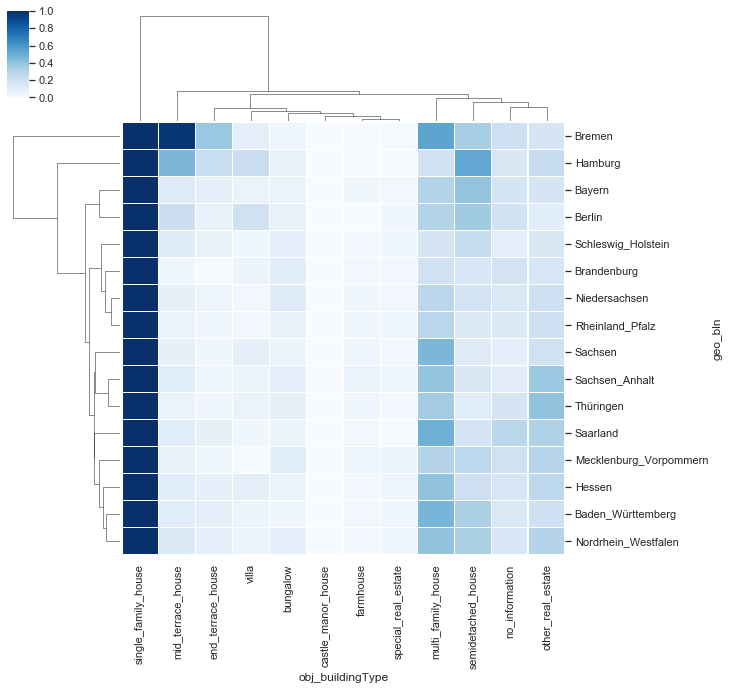

In [340]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and type

## That is a new chart. It does the following: 
        -Scale the data by row (standard_scale=1) or column (standard_scale=0) to 0-1
        -Show the data as map - the higher, the darker
        -Cluster the data by column and row

Looking on the chart we see that:

         -Most of the houses are single family house
         -Bremen has the most mid terrace houses
         
The chart will be used more frequently in the analysis

In [55]:
grouped = df_full.groupby(['obj_buildingType','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_buildingType', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_buildingType,bungalow,castle_manor_house,end_terrace_house,farmhouse,mid_terrace_house,multi_family_house,no_information,other_real_estate,semidetached_house,single_family_house,special_real_estate,villa
geo_bln,,,,,,,,,,,,
Baden_Württemberg,691760.23,2428428.57,486619.88,454291.50,445159.31,762725.20,642074.73,480211.51,473853.00,542591.94,834614.64,1569751.55
Bayern,461935.69,2229722.22,693850.84,835391.15,596256.99,828129.27,566313.59,554135.63,739075.57,638770.83,1058015.80,2409444.74
Berlin,676635.96,0.00,645686.61,0.00,625301.61,2730947.38,978635.18,1133775.73,616030.03,877774.71,1298071.43,2684626.21
Brandenburg,249061.23,1445714.29,368173.46,292903.28,316287.73,597928.21,435904.31,296052.36,351141.43,397620.70,421774.19,1092446.15
Bremen,388075.00,0.00,335782.41,399000.00,295138.20,512938.02,479361.36,364842.86,333447.40,418216.93,567250.00,998761.90
Hamburg,1038683.44,0.00,530078.79,0.00,511125.02,1428968.84,1204885.96,961584.84,644006.69,946771.01,1573750.00,3305855.80
Hessen,488433.43,680000.00,496327.12,262878.32,490329.14,705455.98,737134.14,403823.29,534285.55,459622.52,900352.79,1639549.16
Mecklenburg_Vorpommern,205769.65,2025857.14,187676.79,339310.53,188391.50,414908.97,409962.74,227961.10,216074.72,307486.82,442767.80,1091935.57
Niedersachsen,309831.63,1149666.67,301020.92,358849.55,266876.37,444024.46,441659.60,246716.79,283123.72,327654.30,568398.24,787701.43


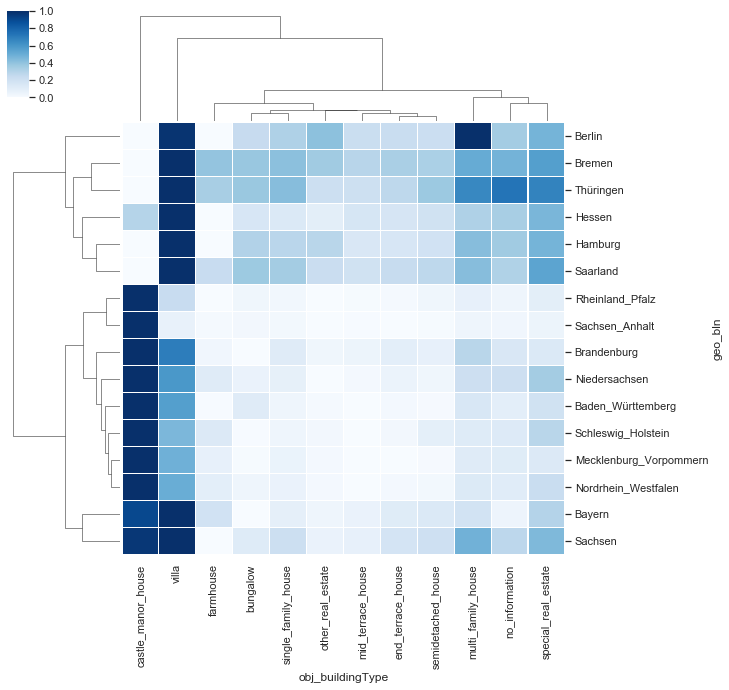

In [56]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average prices of houses by Region and type

## The same chart as before just with average prices

We see that the castles are the most expensives. Also Villa types stand out. Berlin has the most expensive multi family houses. Rheinland Pfalz and Sachsen Anhalt seem to be on the lower scale in terms of pricing. 

In [57]:
grouped = df_full.groupby('obj_condition').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_condition').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_condition','URL']], left_on='obj_condition', right_on='obj_condition')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_condition,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,no_information,429112.12,231.71,1723.33,3.87,6.87,2.18,11.60,3.99,171.45,...,2005.66,1959.94,311.65,4.27,2473.47,2532.70,1544.24,68.47,648.37,40377
1,well_kept,513694.77,213.39,1392.05,2.53,7.26,2.29,17.75,4.17,158.08,...,2009.65,1964.40,372.55,4.23,2854.02,3285.40,1793.14,70.11,746.20,24765
2,first_time_use,495389.31,158.40,637.89,2.07,5.11,2.09,12.15,4.43,33.66,...,2018.76,2018.95,398.46,5.83,3239.63,3200.78,3933.78,69.50,617.62,14480
3,need_of_renovation,307637.77,194.01,1472.27,2.30,7.31,2.26,15.00,3.83,239.68,...,2000.42,1932.27,315.99,3.48,2419.37,1973.55,893.03,68.78,663.11,8438
4,mint_condition,783510.38,210.50,1411.88,2.58,6.26,2.23,18.16,4.33,79.33,...,2014.10,1998.01,413.66,4.96,3231.27,3664.36,1668.46,70.42,752.86,6174
5,modernized,572324.40,274.91,1506.64,2.71,7.72,2.40,18.89,3.95,156.54,...,2012.58,1950.66,386.34,4.81,2976.55,2909.74,1299.15,70.68,861.94,5084
6,refurbished,679340.03,272.11,2035.57,3.06,8.99,2.41,18.12,4.07,156.24,...,2011.44,1929.44,378.83,4.51,2922.27,2554.92,1738.84,71.55,865.19,3233
7,fully_renovated,592441.03,228.84,2070.18,2.90,7.76,2.32,18.00,3.94,153.88,...,2012.63,1941.97,354.28,3.91,2713.84,2750.46,1698.21,68.77,716.27,2035
8,negotiable,481542.17,236.86,1387.61,2.79,8.41,2.17,15.91,4.02,186.31,...,2008.98,1957.47,370.26,4.61,2815.50,2253.11,1923.19,69.68,702.38,457
9,first_time_use_after_refurbishment,793892.18,254.04,1439.31,2.71,8.68,2.48,17.84,3.96,135.18,...,2018.03,1942.31,385.64,4.04,2994.43,3173.52,2996.61,69.27,1163.46,446


In [58]:
grouped = df_full.groupby(['obj_condition','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_condition','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_condition','geo_bln'], right_on=['obj_condition','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_condition','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_condition', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_condition,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,negotiable,no_information,refurbished,ripe_for_demolition,well_kept
geo_bln,,,,,,,,,,,
Baden_Württemberg,1548.00,58.00,288.00,726.00,573.00,996.00,82.00,4493.00,332.00,9.00,2889.00
Bayern,2533.00,60.00,266.00,946.00,520.00,958.00,56.00,4927.00,303.00,11.00,3234.00
Berlin,238.00,16.00,34.00,155.00,112.00,124.00,7.00,663.00,120.00,2.00,430.00
Brandenburg,822.00,14.00,64.00,280.00,161.00,306.00,26.00,2182.00,201.00,7.00,944.00
Bremen,72.00,8.00,16.00,39.00,43.00,62.00,1.00,272.00,27.00,0.00,242.00
Hamburg,206.00,8.00,17.00,100.00,81.00,59.00,6.00,399.00,24.00,0.00,261.00
Hessen,1056.00,25.00,173.00,530.00,495.00,773.00,30.00,3224.00,270.00,8.00,2166.00
Mecklenburg_Vorpommern,282.00,13.00,49.00,219.00,131.00,246.00,12.00,1192.00,118.00,9.00,728.00
Niedersachsen,1246.00,40.00,245.00,837.00,633.00,902.00,46.00,4736.00,311.00,10.00,3520.00


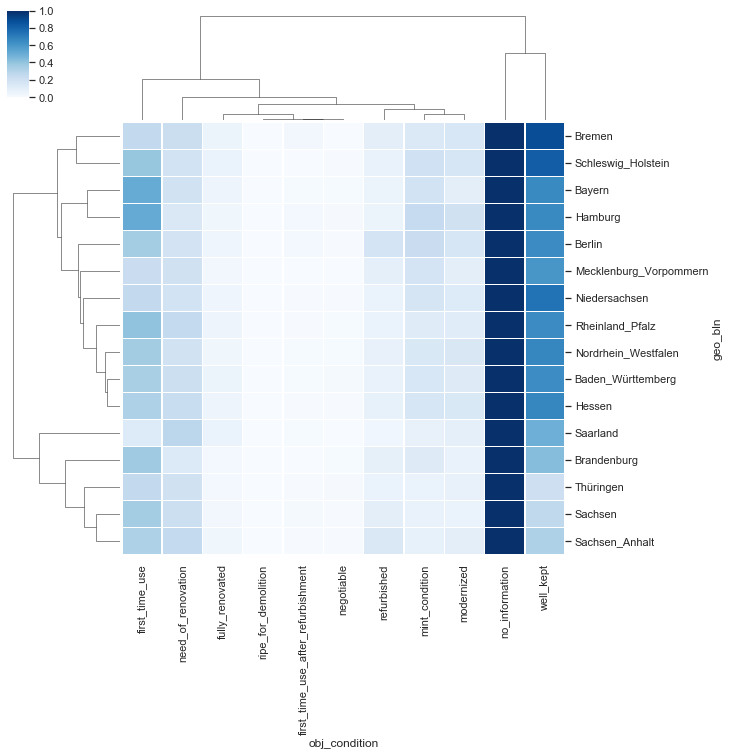

In [59]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and condition

We see that the most of the houses have no information. We also see that Bremen and Schleswig Hollstein have well-kept homes. Bayern and Hamburg have the most first-time usage homes.

In [60]:
grouped = df_full.groupby(['obj_condition','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_condition', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_condition,first_time_use,first_time_use_after_refurbishment,fully_renovated,mint_condition,modernized,need_of_renovation,negotiable,no_information,refurbished,ripe_for_demolition,well_kept
geo_bln,,,,,,,,,,,
Baden_Württemberg,545466.15,864014.57,686658.16,914047.21,689967.50,450139.76,662745.51,539186.23,781244.58,214444.44,643733.88
Bayern,743563.81,879718.35,913938.35,1123129.36,807790.75,456058.10,633746.38,637250.75,952874.40,699387.27,727893.09
Berlin,853489.07,3024187.44,880588.21,1417456.06,1397324.11,1150800.23,1058285.71,1151875.53,2159866.75,387500.00,1003473.91
Brandenburg,412103.59,632064.29,469725.00,711617.74,451959.25,291542.36,336516.35,355057.57,769499.00,262428.57,453741.19
Bremen,403819.44,432875.00,342681.25,570557.05,463062.56,330605.48,459000.00,398133.05,370684.81,0.00,389156.48
Hamburg,851118.75,1810500.00,721145.06,1480731.50,1504559.26,551116.95,1155783.33,988423.77,2351579.17,0.00,840404.60
Hessen,587120.00,1092376.00,817929.47,913218.32,660044.14,367108.94,375293.97,516886.39,778037.07,372661.25,576575.42
Mecklenburg_Vorpommern,361023.33,374704.00,537674.69,504059.80,347803.86,154271.00,209411.83,270552.10,404270.69,70111.11,354044.16
Niedersachsen,347067.93,460407.45,436697.60,513530.14,393382.61,219933.48,368294.50,310702.84,428935.37,135130.00,360363.09


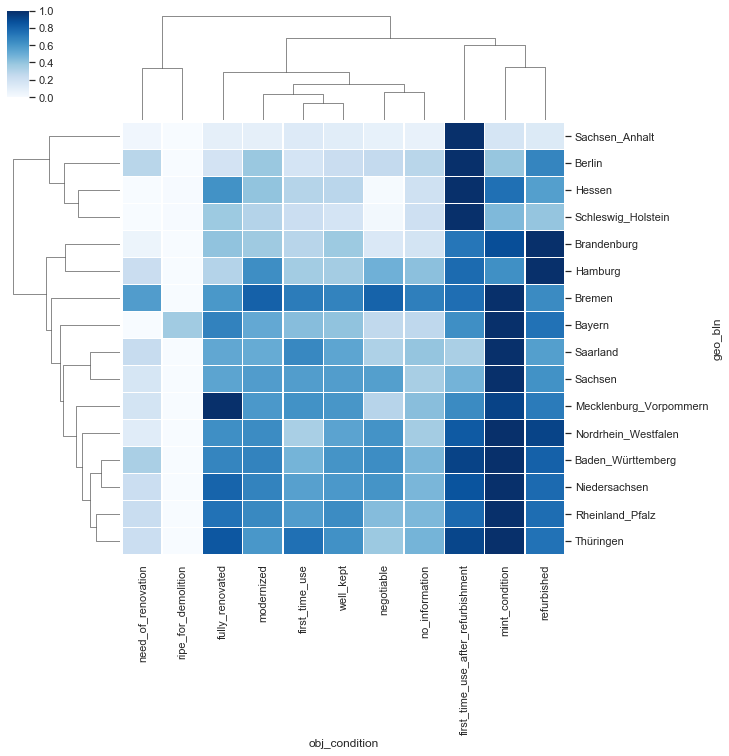

In [61]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and condition

The most expensive homes are in mint-condition. 

In [62]:
grouped = df_full.groupby('obj_constructionPhase').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_constructionPhase').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_constructionPhase','URL']], left_on='obj_constructionPhase', right_on='obj_constructionPhase')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_constructionPhase,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,no_information,500276.55,234.26,1709.24,2.62,7.28,2.30,13.99,4.01,161.39,...,2008.35,1957.99,333.11,4.56,2585.22,2671.88,1733.72,69.32,734.84,64111
1,completed,496366.72,204.64,1329.68,2.54,7.08,2.29,17.63,4.16,161.79,...,2009.87,1960.44,364.90,4.02,2817.93,3304.97,1409.28,70.12,704.47,23203
2,projected,417481.36,168.48,777.58,5.33,5.05,1.95,12.36,4.33,32.73,...,2018.65,2019.03,399.55,4.71,3294.66,2795.18,2980.96,68.83,515.83,16898
3,under_construction,668169.25,173.39,550.93,1.81,5.62,2.52,11.01,4.54,51.04,...,2017.59,2011.46,365.78,5.55,2878.87,3877.57,3771.52,67.50,875.95,1376


In [63]:
grouped = df_full.groupby(['obj_constructionPhase','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_constructionPhase','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_constructionPhase','geo_bln'], right_on=['obj_constructionPhase','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_constructionPhase','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_constructionPhase', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_constructionPhase,completed,no_information,projected,under_construction
geo_bln,,,,
Baden_Württemberg,2941,6863,2082,108
Bayern,2826,7673,2996,319
Berlin,464,1184,221,32
Brandenburg,1081,2660,1189,77
Bremen,165,546,54,17
Hamburg,157,848,130,26
Hessen,2021,5287,1299,143
Mecklenburg_Vorpommern,644,2025,294,36
Niedersachsen,2761,8462,1162,141


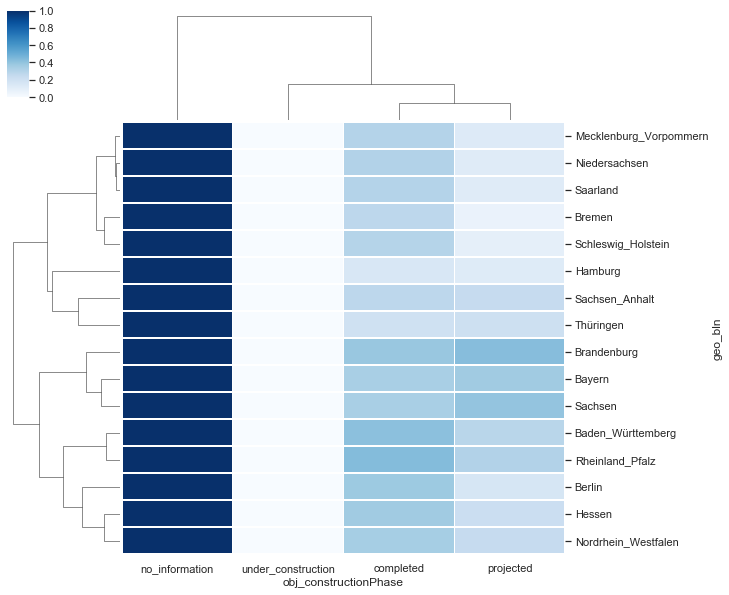

In [64]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Amount of houses by Region and construction phase

Most of the homes are finished but we see that Sachsen and Brandenburg and Sachsen have more projected than completed houses.

In [65]:
grouped = df_full.groupby(['obj_constructionPhase','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_constructionPhase', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_constructionPhase,completed,no_information,projected,under_construction
geo_bln,,,,
Baden_Württemberg,612057.19,623467.33,491901.17,874494.34
Bayern,739141.60,776819.21,524248.44,954299.19
Berlin,1002021.83,1325099.69,931569.76,724494.06
Brandenburg,471900.73,428298.15,348179.15,569234.70
Bremen,380622.67,409874.23,392476.94,342916.47
Hamburg,792053.92,1080178.90,852875.67,1169752.12
Hessen,607651.45,577026.32,498144.38,678570.84
Mecklenburg_Vorpommern,350694.79,315190.54,264173.57,451185.56
Niedersachsen,348200.57,346193.92,328126.12,387028.08


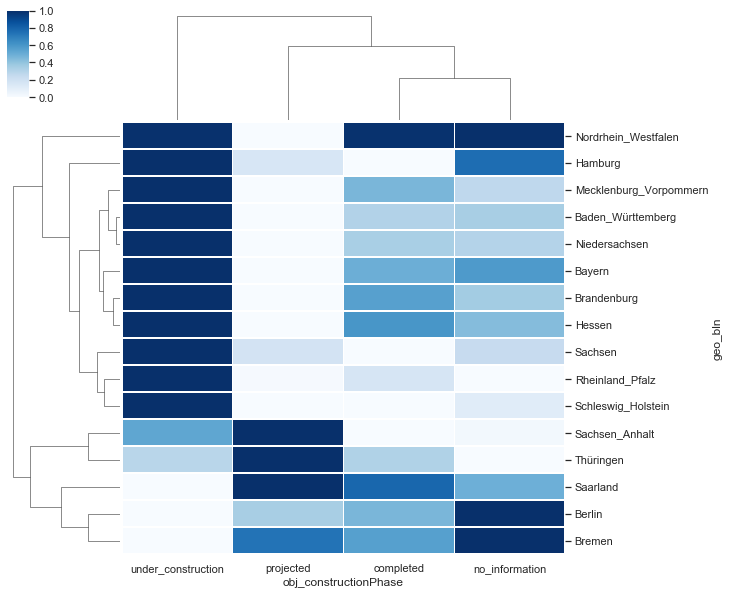

In [66]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## ↑ Clustermap: Average price of houses by Region and construction phase

Interestingly, the projected houses in Sachsen, Sachsen-Anhalt, Thüringen and Saarland are more expensive.

In [67]:
grouped = df_full.groupby('obj_interiorQual').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_interiorQual').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_interiorQual','URL']], left_on='obj_interiorQual', right_on='obj_interiorQual')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_interiorQual,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,no_information,455127.62,230.85,1672.65,2.52,7.08,2.25,12.69,4.01,166.20,...,2007.16,1957.40,324.38,4.45,2542.81,2532.57,1640.76,68.76,696.08,51555
1,sophisticated,549860.93,187.79,1074.43,2.36,5.97,2.16,15.72,4.32,92.32,...,2013.46,1995.96,401.73,4.73,3206.91,3102.77,2417.53,70.23,674.60,27882
2,normal,416877.85,219.30,1274.55,3.84,7.44,2.28,16.92,4.08,172.94,...,2008.94,1956.96,348.25,4.19,2663.87,3143.69,1793.82,70.09,719.12,18926
3,simple,241943.21,177.96,1578.86,2.36,6.99,2.25,14.77,3.80,251.38,...,2000.16,1923.81,299.57,3.57,2292.31,2042.37,1103.83,67.25,565.48,4627
4,luxury,1447189.96,285.29,2583.71,3.62,7.31,2.41,18.88,4.31,86.40,...,2014.27,1991.58,452.51,5.85,3551.77,5588.76,3178.65,72.07,953.34,2598


In [68]:
grouped = df_full.groupby(['obj_interiorQual','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_interiorQual','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_interiorQual','geo_bln'], right_on=['obj_interiorQual','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_interiorQual','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_interiorQual', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_interiorQual,luxury,no_information,normal,simple,sophisticated
geo_bln,,,,,
Baden_Württemberg,285,5565,2387,506,3251
Bayern,475,5676,2129,469,5065
Berlin,84,872,272,61,612
Brandenburg,85,2437,791,201,1493
Bremen,14,454,167,36,111
Hamburg,66,670,135,13,277
Hessen,314,4210,1629,381,2216
Mecklenburg_Vorpommern,40,1613,639,183,524
Niedersachsen,203,7072,2284,444,2523


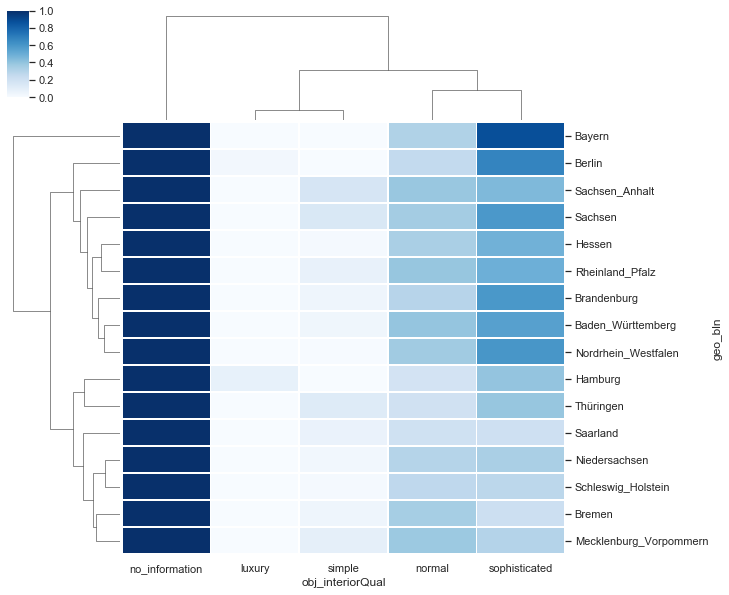

In [69]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [70]:
grouped = df_full.groupby(['obj_interiorQual','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_interiorQual', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_interiorQual,luxury,no_information,normal,simple,sophisticated
geo_bln,,,,,
Baden_Württemberg,1411021.03,565071.45,560542.56,376551.76,652779.53
Bayern,1853873.95,714215.86,581516.54,373951.75,706121.69
Berlin,2843648.26,1277895.47,796460.22,1514639.33,981528.43
Brandenburg,1298405.88,408663.49,346495.06,203561.69,459439.35
Bremen,883785.57,404878.63,335250.12,351959.44,439389.14
Hamburg,2320244.66,969924.42,751321.19,504038.46,977130.66
Hessen,1811004.87,523367.96,466958.49,246944.08,630023.11
Mecklenburg_Vorpommern,1014679.15,294577.04,290563.60,137847.21,441568.48
Niedersachsen,863182.75,330726.43,297402.42,178355.21,417815.30


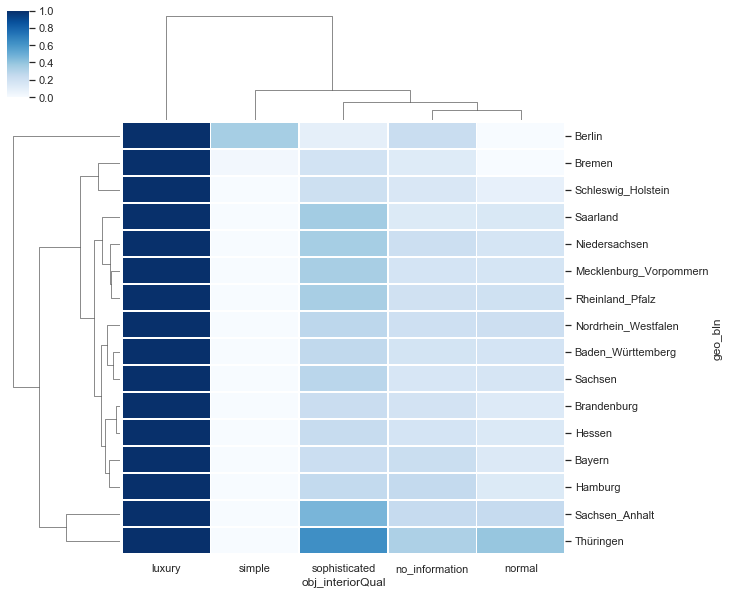

In [71]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## Accessories

In [72]:
grouped = df_full.groupby('obj_firingTypes').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_firingTypes').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_firingTypes','URL']], left_on='obj_firingTypes', right_on='obj_firingTypes')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_firingTypes,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,gas,523962.31,215.78,1052.55,2.47,7.15,2.33,16.14,4.14,156.14,...,2010.15,1963.96,369.56,4.36,2870.58,2757.73,1598.60,71.04,863.69,35500
1,no_information,427006.17,230.71,1736.10,2.73,6.60,2.10,9.85,4.02,117.77,...,2007.01,1965.27,310.70,4.64,2493.81,2598.03,1625.24,69.16,639.77,26105
2,oil,473924.15,213.25,1928.86,2.66,7.35,2.24,17.79,3.93,192.22,...,2008.09,1955.01,360.48,4.18,2759.01,3145.28,829.49,67.36,486.94,18765
3,electricity,410087.07,160.30,997.51,2.09,5.81,2.13,14.66,4.10,129.95,...,2007.01,1972.16,344.93,4.14,2710.91,2569.17,7938.28,69.03,532.00,4849
4,solar_heating,547237.23,180.15,1343.57,11.66,5.87,2.09,18.50,4.33,66.35,...,2012.40,2002.39,486.73,5.09,3962.26,3044.70,1562.64,68.80,537.68,2766
5,geothermal,660501.73,179.12,1711.09,2.31,5.71,2.03,14.97,4.49,34.08,...,2014.07,2009.64,374.97,4.38,2988.62,3437.85,1458.88,67.99,590.52,1865
6,natural_gas_light,616920.79,222.44,1330.43,2.61,7.66,2.38,17.09,4.34,145.53,...,2010.01,1966.64,355.40,4.01,2734.60,2877.57,1156.02,74.64,906.20,1422
7,district_heating,722244.84,236.90,710.48,2.40,7.73,2.55,14.80,3.81,121.49,...,2012.19,1981.12,359.30,4.15,2792.97,3362.43,2564.44,77.55,1636.78,1413
8,environmental_thermal_energy,526812.86,155.19,619.35,1.73,6.15,2.18,10.75,4.51,29.70,...,2016.89,2015.76,342.37,4.69,2734.14,3343.40,1596.30,70.56,693.33,1077
9,pellet_heating,586124.57,218.37,1845.92,2.72,7.19,2.41,17.59,3.97,143.63,...,2012.42,1961.61,401.85,4.50,3110.00,2781.07,1084.81,65.10,567.17,986


In [73]:
grouped = df_full.groupby(['obj_firingTypes','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_firingTypes','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_firingTypes','geo_bln'], right_on=['obj_firingTypes','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_firingTypes','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_firingTypes', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_firingTypes,bio_energy,coal,coal_coke,combined_heat_and_power_bio_energy,combined_heat_and_power_fossil_fuels,combined_heat_and_power_regenerative_energy,combined_heat_and_power_renewable_energy,district_heating,electricity,environmental_thermal_energy,...,natural_gas_heavy,natural_gas_light,no_information,oil,pellet_heating,solar_heating,steam_district_heating,wind_energy,wood,wood_chips
geo_bln,,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,14.00,8.00,3.00,0.00,2.00,1.00,3.00,208.00,859.00,107.00,...,19.00,123.00,2685.00,3073.00,165.00,486.00,7.00,0.00,137.00,12.00
Bayern,33.00,12.00,1.00,1.00,4.00,7.00,8.00,162.00,789.00,210.00,...,31.00,127.00,3599.00,3358.00,249.00,503.00,2.00,1.00,149.00,33.00
Berlin,0.00,1.00,0.00,0.00,15.00,6.00,1.00,41.00,27.00,13.00,...,19.00,70.00,386.00,292.00,10.00,32.00,0.00,3.00,3.00,0.00
Brandenburg,0.00,49.00,6.00,0.00,0.00,6.00,5.00,50.00,188.00,48.00,...,15.00,97.00,1199.00,390.00,20.00,87.00,0.00,0.00,44.00,1.00
Bremen,0.00,0.00,1.00,0.00,1.00,0.00,0.00,34.00,8.00,0.00,...,4.00,18.00,107.00,115.00,2.00,7.00,0.00,0.00,0.00,0.00
Hamburg,0.00,0.00,0.00,0.00,1.00,0.00,0.00,36.00,27.00,10.00,...,2.00,22.00,307.00,132.00,10.00,17.00,1.00,0.00,0.00,0.00
Hessen,6.00,2.00,1.00,0.00,3.00,3.00,4.00,108.00,407.00,112.00,...,25.00,103.00,2205.00,1919.00,110.00,136.00,3.00,0.00,48.00,0.00
Mecklenburg_Vorpommern,3.00,41.00,4.00,0.00,0.00,0.00,0.00,41.00,148.00,21.00,...,19.00,84.00,737.00,356.00,6.00,35.00,0.00,0.00,29.00,4.00
Niedersachsen,13.00,5.00,0.00,0.00,5.00,0.00,6.00,122.00,337.00,80.00,...,18.00,206.00,2687.00,1703.00,61.00,220.00,2.00,0.00,40.00,4.00


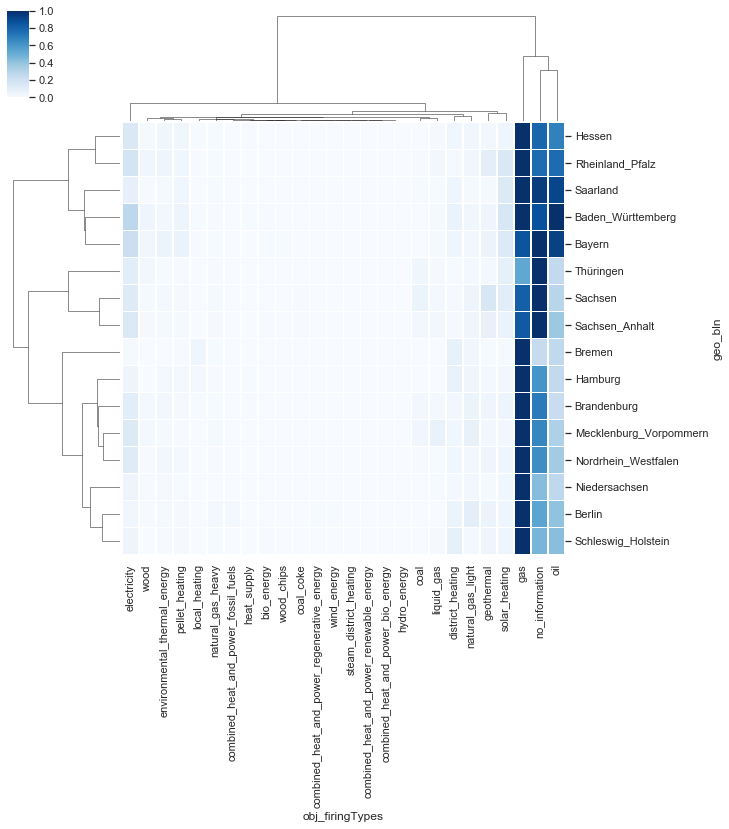

In [74]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [75]:
grouped = df_full.groupby(['obj_firingTypes','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_firingTypes', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_firingTypes,bio_energy,coal,coal_coke,combined_heat_and_power_bio_energy,combined_heat_and_power_fossil_fuels,combined_heat_and_power_regenerative_energy,combined_heat_and_power_renewable_energy,district_heating,electricity,environmental_thermal_energy,...,natural_gas_heavy,natural_gas_light,no_information,oil,pellet_heating,solar_heating,steam_district_heating,wind_energy,wood,wood_chips
geo_bln,,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,654857.14,175750.00,391550.00,0.00,548450.00,597000.00,861666.67,940839.06,491893.12,575100.84,...,1097868.42,817608.94,530037.97,575385.10,626313.33,609815.35,1235000.00,0.00,311529.91,1132416.67
Bayern,667551.52,296416.67,378000.00,950000.00,1548875.00,603235.71,877596.12,1091959.57,599522.74,706691.46,...,988961.29,1052495.28,666416.70,661263.68,798647.87,793356.98,1215000.00,470000.00,370290.00,771900.00
Berlin,0.00,169000.00,0.00,0.00,569789.33,661000.00,513000.00,2627024.39,641961.48,758450.00,...,675521.05,1149155.70,1241747.10,1096097.08,1697699.20,1129944.28,0.00,439366.67,813966.67,0.00
Brandenburg,0.00,145734.67,154466.67,0.00,0.00,411733.80,1000960.00,550931.26,334379.63,514511.21,...,425193.33,504208.81,364512.94,366432.79,346850.00,523512.87,0.00,0.00,324511.36,492000.00
Bremen,0.00,0.00,550000.00,0.00,247900.00,0.00,0.00,330304.41,275000.00,0.00,...,351000.00,435600.00,357420.55,447859.03,649500.00,331571.43,0.00,0.00,0.00,0.00
Hamburg,0.00,0.00,0.00,0.00,1550000.00,0.00,0.00,863543.33,683625.93,536850.00,...,400000.00,1415363.64,907837.73,851484.85,1766000.00,1976290.59,1799000.00,0.00,0.00,0.00
Hessen,486631.67,199000.00,20500.00,0.00,456666.67,493333.33,728500.00,697000.91,481391.68,682449.52,...,1080838.00,733334.95,458293.58,457477.98,448105.27,576819.21,985666.67,0.00,212576.42,0.00
Mecklenburg_Vorpommern,236666.67,75985.37,79000.00,0.00,0.00,0.00,0.00,454748.88,250293.18,317037.24,...,669421.05,275314.29,263429.54,322903.33,436156.33,474669.31,0.00,0.00,163140.00,208250.00
Niedersachsen,377538.46,94000.00,0.00,0.00,519588.00,0.00,295697.33,480591.84,290712.80,417861.74,...,485138.89,440561.65,313969.05,313089.47,411632.77,439381.27,559500.00,0.00,188235.00,355000.00


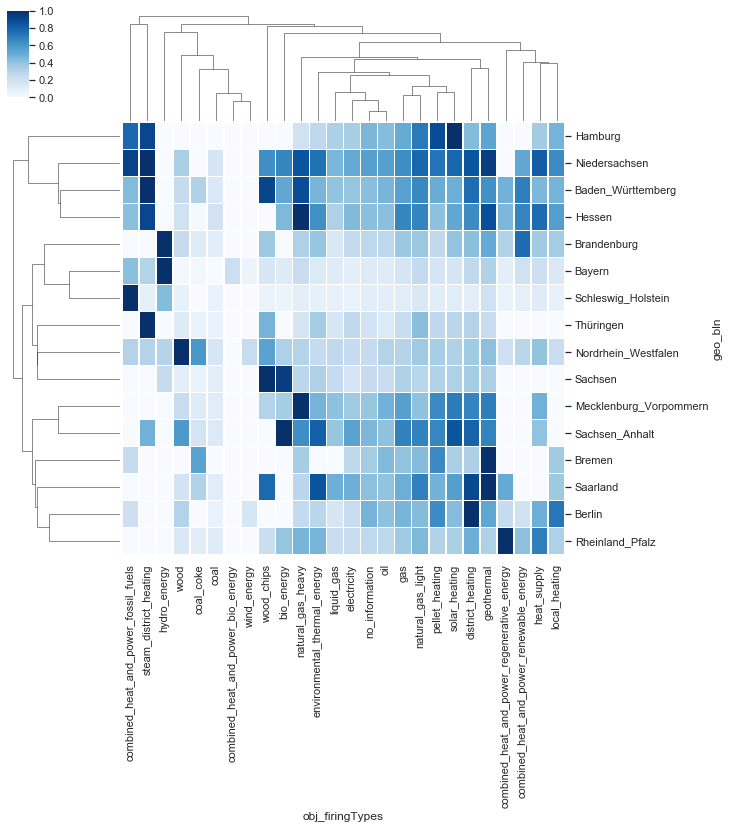

In [76]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [77]:
grouped = df_full.groupby('obj_heatingType').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_heatingType').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_heatingType','URL']], left_on='obj_heatingType', right_on='obj_heatingType')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_heatingType,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,central_heating,508262.31,216.96,1489.01,2.60,7.25,2.28,16.74,4.04,163.07,...,2009.40,1960.78,375.43,4.33,2903.97,3008.21,1365.65,69.70,708.46,41561
1,floor_heating,597271.36,172.13,900.89,5.63,5.47,2.15,14.73,4.44,62.25,...,2014.10,2008.61,423.21,4.86,3407.46,3395.40,1694.54,70.82,666.48,9804
2,gas_heating,509126.52,227.87,1033.03,2.32,6.88,2.27,16.01,4.23,147.33,...,2010.63,1967.30,338.72,4.22,2622.11,2724.44,1477.16,71.03,793.33,8597
3,no_information,485611.47,273.38,1943.31,2.43,6.60,2.15,12.83,4.43,145.47,...,2010.39,1979.16,323.30,5.93,2562.54,3203.02,3458.06,68.14,638.59,7634
4,heat_pump,564020.18,156.82,911.95,1.86,5.24,2.05,10.99,4.25,33.25,...,2015.80,2014.90,358.85,4.63,2903.36,3550.44,7867.37,69.83,614.19,4822
5,oil_heating,489011.81,215.32,2192.94,2.68,7.56,2.24,18.17,3.97,190.77,...,2008.78,1955.03,333.14,3.80,2536.90,2393.09,981.72,66.71,548.53,4284
6,stove_heating,228376.11,167.65,1732.52,2.48,6.51,2.10,15.60,3.88,242.38,...,2001.94,1921.60,325.05,3.52,2495.76,1521.22,526.60,63.87,310.54,2505
7,self_contained_central_heating,543022.19,273.43,856.36,3.01,9.95,2.61,15.28,3.76,179.84,...,2008.83,1934.88,346.60,4.49,2669.17,2365.23,1523.56,73.75,1527.13,2274
8,district_heating,735419.85,258.87,1057.87,2.47,8.34,2.60,14.46,4.02,125.87,...,2011.98,1978.77,348.07,4.14,2692.58,3239.35,2733.21,76.68,1730.50,1063
9,electric_heating,287477.09,157.42,1082.53,2.25,6.12,2.14,15.32,4.07,168.63,...,2005.73,1942.10,296.69,3.93,2265.13,1927.95,616.94,68.06,398.92,816


In [78]:
grouped = df_full.groupby(['obj_heatingType','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_heatingType','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_heatingType','geo_bln'], right_on=['obj_heatingType','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_heatingType','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_heatingType', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_heatingType,central_heating,combined_heat_and_power_plant,district_heating,electric_heating,floor_heating,gas_heating,heat_pump,night_storage_heater,no_information,oil_heating,self_contained_central_heating,solar_heating,stove_heating,wood_pellet_heating
geo_bln,,,,,,,,,,,,,,
Baden_Württemberg,4701.00,89.00,145.00,157.00,1379.00,730.00,607.00,128.00,657.00,518.00,237.00,29.00,435.00,56.00
Bayern,5426.00,37.00,87.00,97.00,1840.00,690.00,1113.00,64.00,836.00,577.00,143.00,25.00,421.00,81.00
Berlin,783.00,9.00,30.00,3.00,250.00,159.00,76.00,4.00,195.00,107.00,80.00,3.00,1.00,3.00
Brandenburg,1465.00,13.00,36.00,40.00,643.00,415.00,181.00,14.00,977.00,129.00,83.00,5.00,133.00,3.00
Bremen,355.00,18.00,35.00,3.00,33.00,123.00,6.00,0.00,23.00,36.00,46.00,3.00,6.00,0.00
Hamburg,423.00,32.00,39.00,5.00,167.00,132.00,8.00,3.00,58.00,42.00,5.00,4.00,3.00,2.00
Hessen,3621.00,74.00,61.00,80.00,629.00,701.00,491.00,39.00,550.00,458.00,153.00,11.00,146.00,47.00
Mecklenburg_Vorpommern,1207.00,0.00,28.00,35.00,228.00,259.00,59.00,30.00,281.00,115.00,40.00,4.00,117.00,4.00
Niedersachsen,5801.00,29.00,123.00,66.00,830.00,1477.00,249.00,70.00,584.00,449.00,267.00,18.00,168.00,26.00


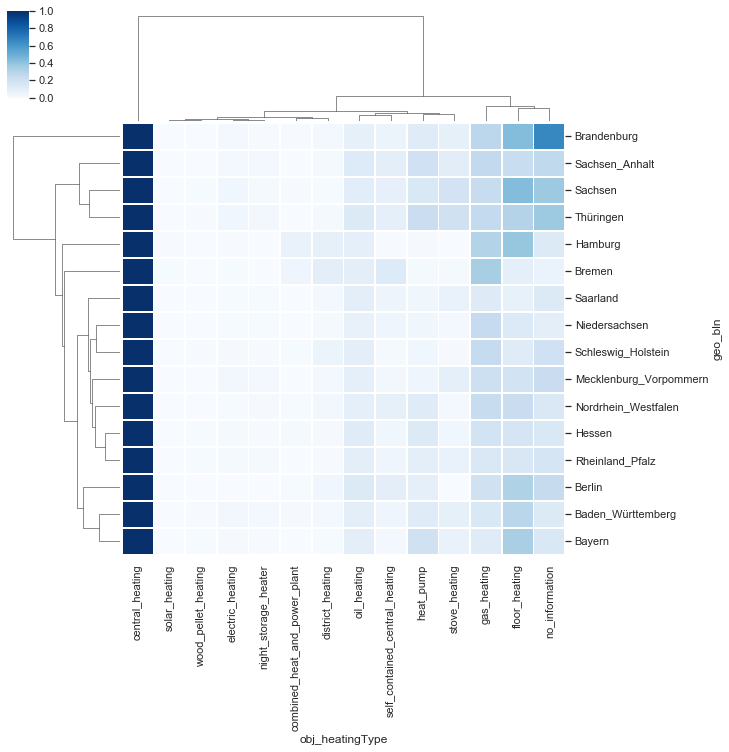

In [79]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [80]:
grouped = df_full.groupby(['obj_heatingType','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_heatingType', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_heatingType,central_heating,combined_heat_and_power_plant,district_heating,electric_heating,floor_heating,gas_heating,heat_pump,night_storage_heater,no_information,oil_heating,self_contained_central_heating,solar_heating,stove_heating,wood_pellet_heating
geo_bln,,,,,,,,,,,,,,
Baden_Württemberg,649469.90,652378.65,1003543.10,459543.69,614824.68,652229.43,559167.53,414400.39,573409.83,604456.37,665787.09,842300.14,359172.41,760439.29
Bayern,720833.16,811478.92,1180450.09,480894.85,812041.66,855351.73,776695.18,434640.62,694596.66,725720.93,727179.72,1114150.40,369049.28,620795.06
Berlin,1228848.41,541871.11,3195400.00,398300.00,839274.34,1010824.58,789086.84,718500.00,1126937.51,1145749.53,1775438.06,733200.00,729000.00,643333.33
Brandenburg,505099.03,456866.92,767772.38,144308.89,527034.71,450160.38,483600.54,127785.71,348279.97,306247.96,555191.30,534985.60,156971.70,91666.67
Bremen,405154.68,353148.33,342490.00,187266.67,451493.33,413417.88,329770.83,0.00,377763.04,464111.06,428424.35,1178000.00,581666.67,0.00
Hamburg,1038493.07,810601.56,840215.41,506400.00,906267.65,1263498.60,874997.50,336300.00,1427365.98,796238.10,762200.00,1605000.00,2058333.33,982500.00
Hessen,606933.38,525236.35,761145.25,235114.98,730261.06,626787.67,665838.56,207171.79,674846.69,497712.77,894773.00,705527.27,184314.30,401171.91
Mecklenburg_Vorpommern,349555.34,0.00,520193.71,179694.26,435839.78,326383.01,399486.31,225476.67,275645.90,281909.61,316954.60,515750.00,113523.72,183500.00
Niedersachsen,349033.30,780154.69,482330.72,173139.38,417298.90,362746.38,457507.58,172718.57,333100.47,329321.04,433564.79,344205.50,188498.71,499823.08


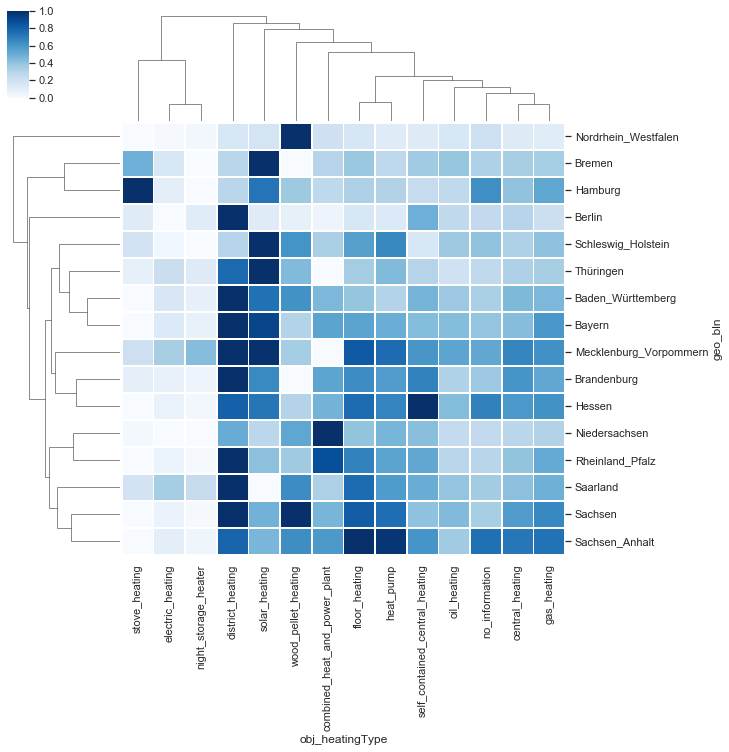

In [81]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [82]:
grouped = df_full.groupby('obj_cellar').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_cellar').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_cellar','URL']], left_on='obj_cellar', right_on='obj_cellar')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_cellar,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,False,435250.09,215.18,1573.98,3.21,6.50,2.07,12.82,4.16,139.12,...,2008.88,1970.98,339.18,4.50,2692.61,2767.77,2117.67,67.49,602.28,62205
1,True,564499.82,218.22,1300.55,2.51,7.37,2.39,16.89,4.03,167.63,...,2009.41,1960.03,368.32,4.44,2841.36,2959.48,1557.91,71.70,828.10,43383


In [83]:
grouped = df_full.groupby(['obj_cellar','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_cellar','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_cellar','geo_bln'], right_on=['obj_cellar','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_cellar','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_cellar', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_cellar,False,True
geo_bln,,
Baden_Württemberg,5689,6305
Bayern,7421,6393
Berlin,1018,883
Brandenburg,3670,1337
Bremen,460,322
Hamburg,628,533
Hessen,4180,4570
Mecklenburg_Vorpommern,2314,685
Niedersachsen,8520,4006


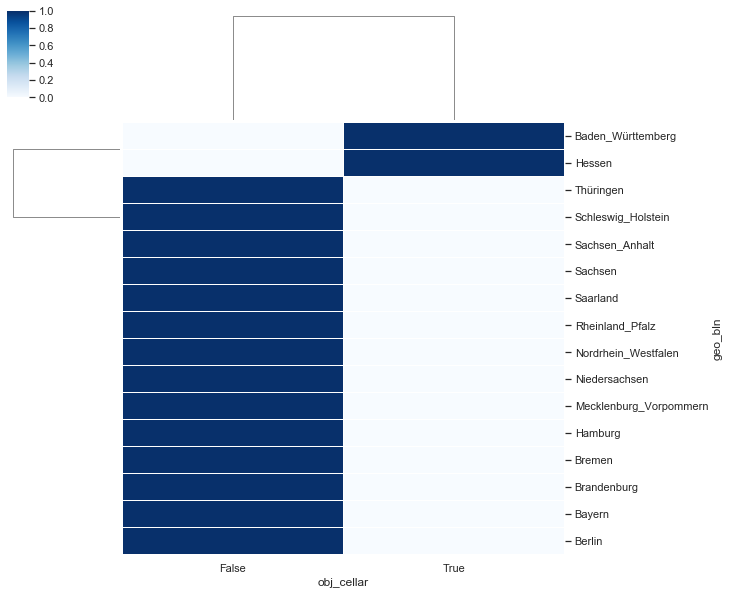

In [84]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [85]:
grouped = df_full.groupby(['obj_cellar','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_cellar', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_cellar,False,True
geo_bln,,
Baden_Württemberg,557307.08,638696.29
Bayern,613529.76,840202.32
Berlin,1246079.03,1126170.37
Brandenburg,394382.53,493515.30
Bremen,401216.12,400801.20
Hamburg,1003920.22,1034089.43
Hessen,501177.39,640701.41
Mecklenburg_Vorpommern,312923.29,341479.54
Niedersachsen,335520.23,366474.26


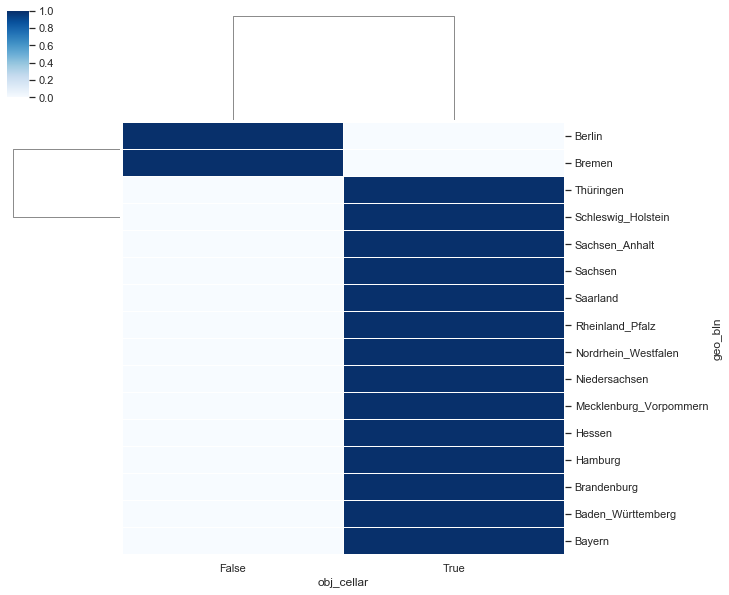

In [86]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [87]:
grouped = df_full.groupby('obj_barrierFree').mean()
grouped = grouped[['obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','obj_yearConstructed','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_barrierFree').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_barrierFree','URL']], left_on='obj_barrierFree', right_on='obj_barrierFree')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('Amount_offers', ascending=False).reset_index(drop="True")
grouped

,obj_barrierFree,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,obj_thermalChar,...,obj_lastRefurbish,obj_yearConstructed,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,False,484317.40,217.56,1461.14,2.84,6.89,2.25,14.40,4.09,155.79,...,2009.05,1964.80,350.14,4.49,2741.37,2839.64,1856.70,69.43,699.86,100126
1,True,562369.84,195.79,1470.74,2.58,6.16,2.04,16.25,4.25,108.19,...,2011.96,1991.48,369.67,4.18,2980.12,2973.64,2451.56,69.36,608.83,5462


In [88]:
grouped = df_full.groupby(['obj_barrierFree','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_barrierFree','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_barrierFree','geo_bln'], right_on=['obj_barrierFree','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_barrierFree','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_barrierFree', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_barrierFree,False,True
geo_bln,,
Baden_Württemberg,11416,578
Bayern,12716,1098
Berlin,1810,91
Brandenburg,4779,228
Bremen,758,24
Hamburg,1120,41
Hessen,8394,356
Mecklenburg_Vorpommern,2894,105
Niedersachsen,11839,687


C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\seaborn\matrix.py:682: UserWarning: Attempting to set identical left == right == 0 results in singular transformations; automatically expanding.
  ax.set_xlim(0, max_dependent_coord * 1.05)


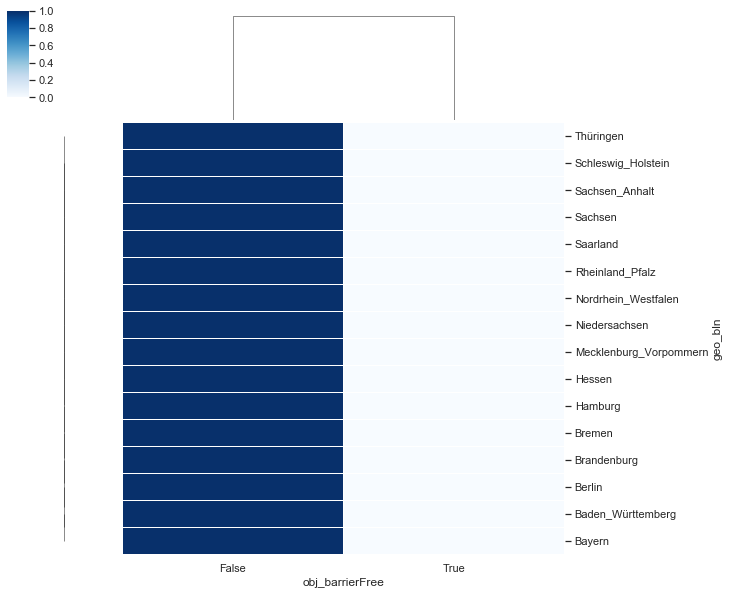

In [89]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

## Time

In [129]:
#Transform method taking points as param
def transform_years(years):
    if years < 1500:
        return "Before 1500"
    elif years >= 1500 and years < 1600:
        return "1500-1599" 
    elif years >= 1600 and years < 1700:
        return "1600-1699"  
    elif years >= 1700 and years < 1800:
        return "1700-1799" 
    elif years >= 1800 and years < 1850:
        return "1800-1849" 
    elif years >= 1850 and years < 1900:
        return "1850-1899" 
    elif years >= 1900 and years < 1910:
        return "1900-1909" 
    elif years >= 1910 and years < 1920:
        return "1910-1919" 
    elif years >= 1920 and years < 1930:
        return "1920-1929" 
    elif years >= 1920 and years < 1930:
        return "1920-1929" 
    elif years >= 1930 and years < 1940:
        return "1930-1939" 
    elif years >= 1940 and years < 1950:
        return "1940-1949" 
    elif years >= 1950 and years < 1960:
        return "1950-1959" 
    elif years >= 1960 and years < 1970:
        return "1960-1969" 
    elif years >= 1970 and years < 1980:
        return "1970-1979" 
    elif years >= 1980 and years < 1990:
        return "1980-1989" 
    elif years >= 1990 and years < 2000:
        return "1990-1999" 
    elif years >= 2000 and years < 2010:
        return "2000-2009" 
    elif years >= 2010 and years <= 2019:
        return "2010-2019"
    elif years > 2019:
        return "Future"
    else:
        return "Not known"

#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(Constructed_years_category = df_full['obj_yearConstructed'].apply(transform_years))
df_full[['obj_yearConstructed','Constructed_years_category']].head(10)

,obj_yearConstructed,Constructed_years_category
0,1964.00,1960-1969
1,1975.00,1970-1979
2,1962.00,1960-1969
3,1973.00,1970-1979
4,1994.00,1990-1999
5,2019.00,2010-2019
6,nan,Not known
7,1900.00,1900-1909
8,1955.00,1950-1959
9,1973.00,1970-1979


In [130]:
grouped = df_full.groupby('Constructed_years_category').mean()
grouped = grouped[['obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','obj_lastRefurbish','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('Constructed_years_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['Constructed_years_category','URL']], left_on='Constructed_years_category', right_on='Constructed_years_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_yearConstructed', ascending=False).reset_index(drop="True")
grouped

,Constructed_years_category,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,obj_pricetrendrent,...,obj_usableArea,obj_lastRefurbish,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Future,2020.73,501452.81,186.52,937.65,2.45,5.15,2.12,12.09,4.40,...,98.30,2019.81,425.10,5.13,3480.50,3307.69,1890.77,70.38,643.74,6659
1,2010-2019,2017.42,558124.81,171.57,774.82,4.83,5.33,2.12,12.83,4.40,...,94.24,2016.34,382.66,5.77,3052.57,3290.96,4469.00,68.70,631.67,12879
2,2000-2009,2003.78,643426.30,199.23,1341.75,2.47,6.20,2.28,16.84,4.43,...,104.98,2013.92,374.44,4.62,2908.60,3212.66,1249.14,68.82,668.62,6607
3,1990-1999,1994.95,540442.48,209.32,1471.88,2.65,6.77,2.29,16.68,4.32,...,120.00,2013.16,366.72,4.52,2832.75,2789.23,1880.68,67.94,529.67,7695
4,1980-1989,1983.84,536370.90,208.26,1285.08,2.46,6.80,2.23,16.88,4.14,...,128.12,2011.50,364.73,4.35,2818.52,2902.74,1080.80,70.08,658.80,6271
5,1970-1979,1974.45,492372.23,207.25,1273.89,2.37,6.90,2.12,16.68,4.02,...,116.43,2009.72,360.29,4.19,2771.31,2598.07,2024.83,69.69,633.96,9403
6,1960-1969,1964.23,487230.90,232.17,1476.58,2.47,7.38,2.23,15.44,4.00,...,122.14,2009.16,344.96,4.44,2657.76,2498.30,1172.65,71.66,799.71,9152
7,1950-1959,1954.58,422617.56,194.73,1246.62,2.47,7.24,2.38,14.70,3.78,...,133.32,2008.03,328.39,4.24,2532.77,2280.09,785.49,71.26,992.77,6757
8,1940-1949,1945.33,352050.38,187.49,2403.15,2.78,6.86,2.25,14.11,3.80,...,148.57,2006.69,318.51,3.79,2455.88,1943.39,1056.30,70.38,843.19,1194
9,1930-1939,1933.98,404533.23,185.07,1359.32,2.47,6.92,2.27,14.73,4.24,...,155.22,2006.90,331.59,3.97,2551.90,2360.94,758.03,72.70,935.27,4462


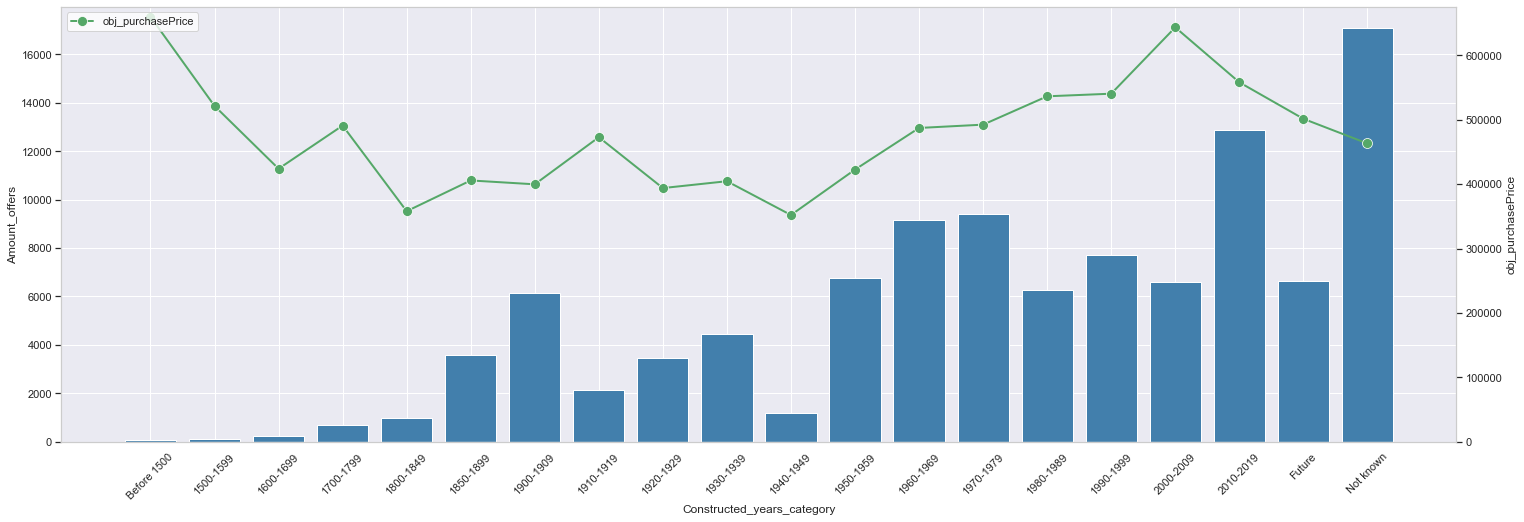

In [131]:
sns.set(font_scale = 1.2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 2, 'lines.markersize': 10})
plt.figure(figsize=(25,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_yearConstructed')
ax= sns.barplot(x = 'Constructed_years_category', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'Constructed_years_category', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
ax.xaxis.grid(True)
plt.show()

(1800, 2020)

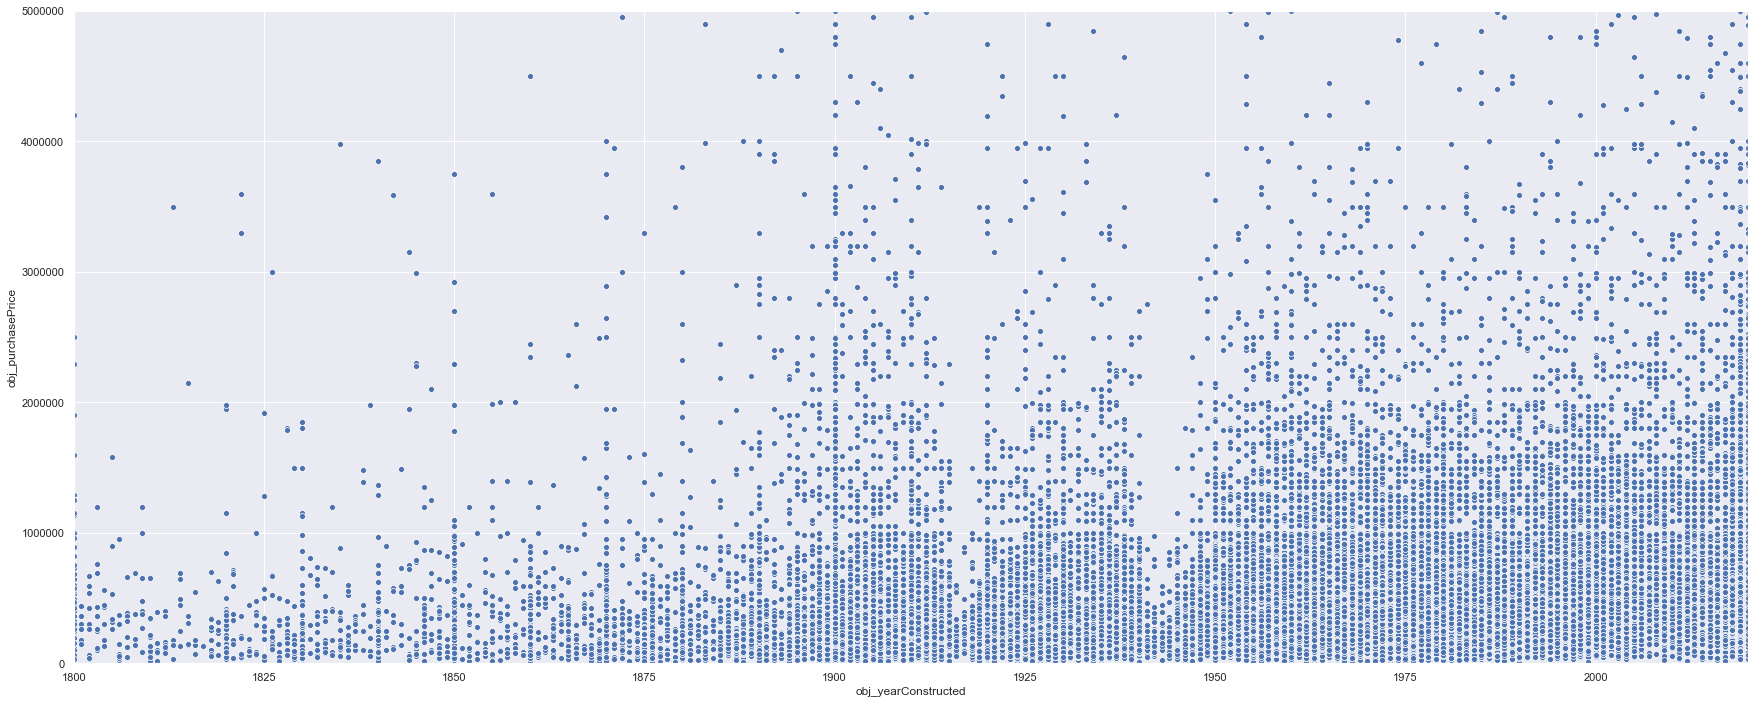

In [132]:
sns.set(font_scale = 1)
plt.figure(figsize=(30,12))
sns.scatterplot(x = 'obj_yearConstructed', y = 'obj_purchasePrice', data=df_full)
plt.ylim(0, 5000000)
plt.xlim(1800, 2020)

In [133]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['Constructed_years_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['Constructed_years_category','geo_bln'], right_on=['Constructed_years_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['Constructed_years_category','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='Amount_offers')
grouped = grouped.reindex_axis(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  if __name__ == '__main__':


Constructed_years_category,Before 1500,1500-1599,1600-1699,1700-1799,1800-1849,1850-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,Future,Not known
geo_bln,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,7.00,19.00,24.00,94.00,106.00,260.00,473.00,153.00,332.00,361.00,127.00,927.00,1342.00,1257.00,802.00,818.00,734.00,1318.00,796.00,2044.00
Bayern,7.00,20.00,24.00,60.00,88.00,213.00,361.00,100.00,227.00,368.00,115.00,751.00,1253.00,1340.00,1069.00,1002.00,913.00,1893.00,1104.00,2906.00
Berlin,0.00,0.00,1.00,1.00,1.00,38.00,92.00,33.00,84.00,201.00,12.00,70.00,113.00,116.00,148.00,148.00,177.00,263.00,112.00,291.00
Brandenburg,0.00,0.00,1.00,17.00,27.00,151.00,301.00,103.00,225.00,421.00,53.00,103.00,70.00,162.00,155.00,538.00,430.00,666.00,208.00,1376.00
Bremen,0.00,0.00,1.00,1.00,5.00,30.00,52.00,26.00,48.00,67.00,15.00,92.00,99.00,84.00,34.00,32.00,38.00,60.00,24.00,74.00
Hamburg,0.00,0.00,0.00,0.00,1.00,28.00,31.00,21.00,39.00,68.00,17.00,95.00,107.00,112.00,65.00,56.00,84.00,203.00,94.00,140.00
Hessen,5.00,27.00,43.00,124.00,87.00,260.00,470.00,136.00,269.00,282.00,86.00,551.00,959.00,989.00,532.00,533.00,468.00,1010.00,629.00,1290.00
Mecklenburg_Vorpommern,4.00,1.00,3.00,22.00,44.00,164.00,265.00,91.00,95.00,188.00,45.00,127.00,70.00,139.00,118.00,352.00,290.00,303.00,61.00,617.00
Niedersachsen,3.00,14.00,27.00,73.00,146.00,457.00,588.00,228.00,277.00,431.00,107.00,871.00,1395.00,1473.00,879.00,1173.00,927.00,1591.00,466.00,1400.00


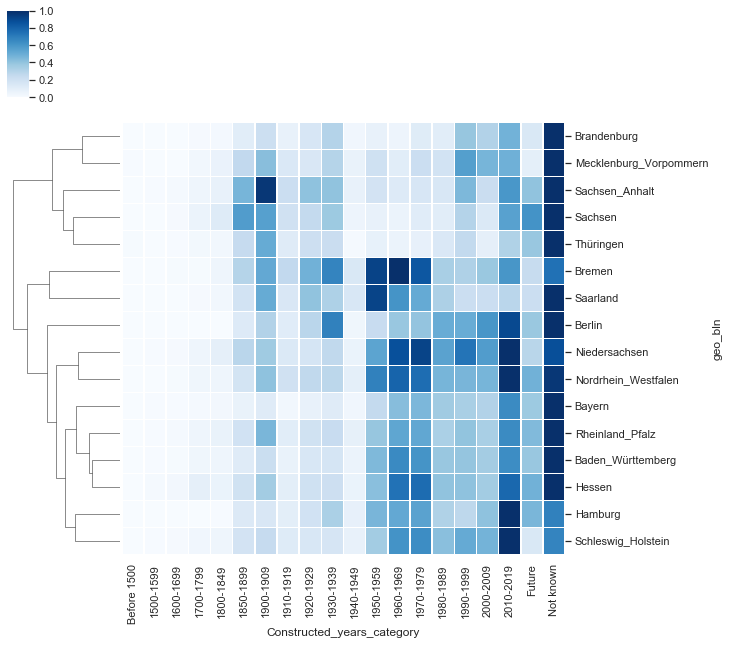

In [134]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

In [135]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='obj_purchasePrice')
grouped = grouped.reindex_axis(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


Constructed_years_category,Before 1500,1500-1599,1600-1699,1700-1799,1800-1849,1850-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,Future,Not known
geo_bln,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,776857.14,644026.26,430958.33,520232.97,468905.66,557180.96,562053.91,657771.56,552252.59,606873.41,465248.44,561439.48,626983.49,617831.23,649853.14,658451.49,723162.21,640767.47,571870.18,523085.38
Bayern,952000.00,979174.95,779791.62,993281.67,582807.95,703307.27,571354.79,826863.00,547176.87,607569.74,590268.69,521709.21,676512.73,687859.64,791255.77,820643.47,985297.40,840572.34,782524.59,595359.76
Berlin,0.00,0.00,530000.00,1090000.00,6000000.00,2501855.26,2695478.26,2918152.73,1358137.57,1112227.82,534416.67,1051242.86,1193135.88,676020.63,1031678.31,906274.28,1143035.59,931795.11,699405.69,1280169.82
Brandenburg,0.00,0.00,48000.00,1051876.47,647981.48,409578.14,439399.71,465368.45,364765.29,363429.05,289116.02,226510.68,230387.84,210456.98,300705.79,507098.42,585137.34,493428.69,436220.85,374567.08
Bremen,0.00,0.00,510000.00,749000.00,514400.00,698166.67,481190.38,385766.54,342256.21,311304.33,244333.33,375445.64,331832.22,362355.71,406323.53,385406.25,544057.89,505540.82,463311.42,361276.92
Hamburg,0.00,0.00,0.00,0.00,599000.00,3031857.14,2392564.52,1570047.62,1311692.31,679970.88,601823.53,628554.74,832334.58,784424.70,955578.46,988598.21,797443.30,941221.71,723575.14,1437168.36
Hessen,462000.00,338144.44,433027.91,281064.11,381689.08,624463.46,504751.78,630403.53,420390.47,432347.59,290249.99,508828.62,621962.18,552086.95,559468.72,662144.62,891404.75,682577.42,528616.50,517077.13
Mecklenburg_Vorpommern,566400.00,45000.00,548166.67,480450.00,486818.18,348611.83,245368.89,377794.38,268645.79,205783.85,218848.89,205513.46,259839.64,234576.97,258019.49,353110.09,429218.61,458767.29,279190.43,290591.51
Niedersachsen,815000.00,391285.71,511666.67,341522.47,246642.47,299072.70,272829.45,323259.64,295736.64,277825.33,382138.82,281571.90,301672.65,342728.14,357606.09,391097.74,433048.29,383285.60,405805.51,347380.45


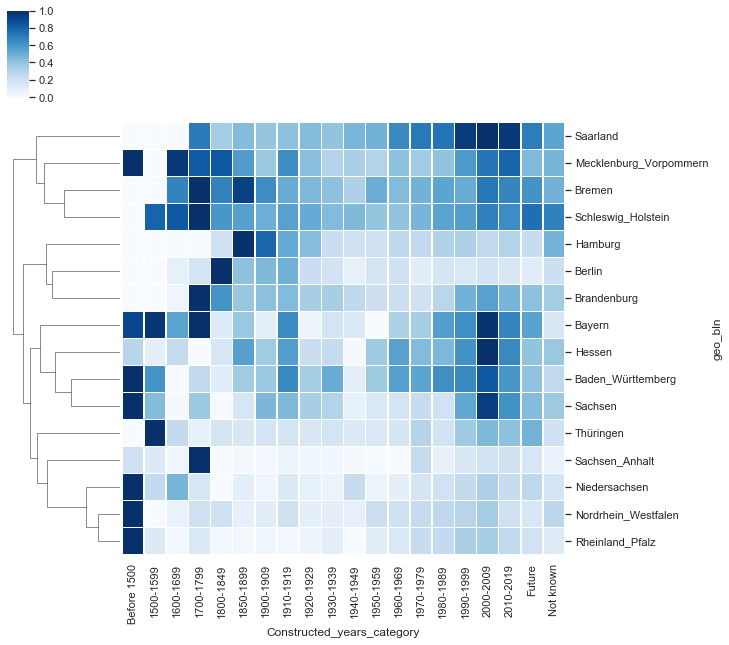

In [136]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

In [148]:
grouped = df_full.groupby(['Constructed_years_category','geo_bln'])['obj_livingSpace'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='Constructed_years_category', values='obj_livingSpace')
grouped = grouped.reindex_axis(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


Constructed_years_category,Before 1500,1500-1599,1600-1699,1700-1799,1800-1849,1850-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,Future,Not known
geo_bln,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,400.97,292.41,245.09,246.00,230.44,234.41,222.00,247.49,199.75,196.34,183.35,196.53,213.57,224.43,231.83,219.67,208.57,176.36,156.70,188.48
Bayern,562.29,403.72,456.76,339.32,262.41,266.78,234.76,294.79,209.19,180.57,194.39,191.23,415.03,211.39,215.37,216.67,205.41,168.41,158.87,279.35
Berlin,0.00,0.00,114.00,415.00,1200.00,455.79,640.70,688.70,270.97,185.74,131.17,251.29,258.38,160.27,212.52,219.53,218.61,182.16,147.63,277.95
Brandenburg,0.00,0.00,78.00,457.41,438.96,326.81,290.44,289.68,225.02,165.92,176.15,179.97,152.70,129.93,182.69,197.64,173.44,155.43,152.09,193.01
Bremen,0.00,0.00,86.00,115.00,278.00,237.15,415.51,238.71,146.48,154.64,121.16,173.41,144.86,156.94,161.39,151.06,179.36,179.57,147.58,187.17
Hamburg,0.00,0.00,0.00,0.00,148.00,493.04,312.81,269.63,207.75,147.97,130.38,132.28,172.39,185.47,191.13,194.28,157.65,170.63,143.13,198.24
Hessen,220.00,266.30,252.56,208.99,233.35,235.83,240.96,214.82,182.84,182.89,177.31,185.79,237.35,232.01,217.72,241.32,233.69,181.45,495.98,204.60
Mecklenburg_Vorpommern,223.22,220.00,369.67,450.97,462.84,279.09,233.46,291.15,232.82,185.95,158.68,174.42,252.30,150.59,179.41,190.60,173.56,166.82,114.58,196.15
Niedersachsen,258.34,259.28,309.12,269.75,214.89,253.88,244.72,248.38,208.32,196.27,222.88,177.03,198.26,193.72,186.45,194.42,185.77,152.22,161.84,203.95


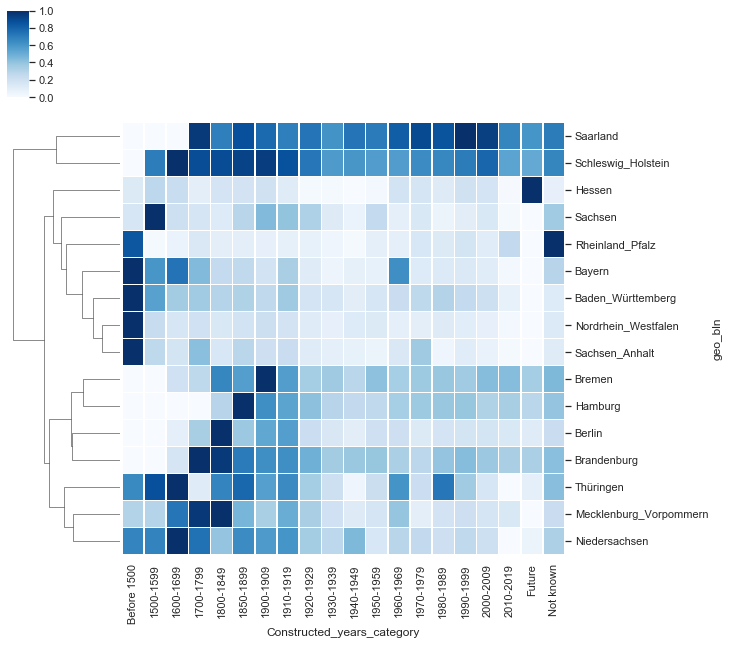

In [149]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

In [137]:
#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(lastRefurbish_years_category = df_full['obj_lastRefurbish'].apply(transform_years))
df_full[['obj_lastRefurbish','lastRefurbish_years_category']].head(10)

,obj_lastRefurbish,lastRefurbish_years_category
0,nan,Not known
1,nan,Not known
2,nan,Not known
3,2015.00,2010-2019
4,nan,Not known
5,nan,Not known
6,nan,Not known
7,nan,Not known
8,nan,Not known
9,nan,Not known


In [139]:
grouped = df_full.groupby('lastRefurbish_years_category').mean()
grouped = grouped[['obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('lastRefurbish_years_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['lastRefurbish_years_category','URL']], left_on='lastRefurbish_years_category', right_on='lastRefurbish_years_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('lastRefurbish_years_category', ascending=False).reset_index(drop="True")
grouped

,lastRefurbish_years_category,obj_lastRefurbish,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,obj_picturecount,...,obj_thermalChar,obj_usableArea,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Not known,nan,1971.74,477882.92,215.03,1425.01,2.85,6.60,2.19,13.55,...,148.01,134.86,347.44,4.50,2743.60,2726.08,2020.14,69.18,681.43,81490
1,Future,2026.06,2015.24,640587.04,181.60,538.39,1.72,6.06,2.13,10.33,...,25.85,114.80,346.65,5.84,2770.32,3513.59,1783.04,75.44,731.54,149
2,Before 1500,762.00,1955.00,351000.00,150.00,161.50,0.00,5.00,0.67,2.00,...,nan,91.67,172.25,2.00,1118.75,1989.44,443.41,16.00,351.55,4
3,2010-2019,2015.59,1956.76,568095.69,223.97,1461.62,2.76,7.65,2.34,18.48,...,153.67,141.12,378.91,4.60,2908.70,3869.62,1613.98,70.33,780.11,15030
4,2000-2009,2004.76,1941.78,491808.68,216.84,1682.53,2.80,7.64,2.36,17.14,...,175.89,143.84,351.51,4.16,2687.73,2429.54,1124.07,70.57,712.33,5245
5,1990-1999,1994.98,1928.76,384690.78,225.93,2258.06,2.91,8.65,2.25,15.67,...,201.25,176.10,326.07,3.88,2484.58,1853.23,725.89,69.42,592.17,2650
6,1980-1989,1984.15,1924.61,415218.90,197.12,1281.61,2.62,7.31,2.26,15.38,...,238.48,129.73,316.96,4.11,2429.58,2124.11,3046.58,65.72,754.48,633
7,1970-1979,1974.30,1921.88,340786.85,197.19,1577.88,2.48,7.39,2.21,14.61,...,250.58,158.26,285.39,3.18,2177.54,1845.79,598.16,64.03,696.51,251
8,1960-1969,1963.98,1913.82,298778.57,178.08,975.23,1.89,6.74,2.23,12.95,...,284.54,144.83,277.70,2.52,2098.58,1635.69,2110.01,76.78,564.63,98
9,1950-1959,1953.44,1905.50,250111.11,168.53,858.17,2.09,7.22,2.25,12.56,...,331.62,146.43,240.22,3.50,1859.28,1797.04,546.71,67.60,618.53,18


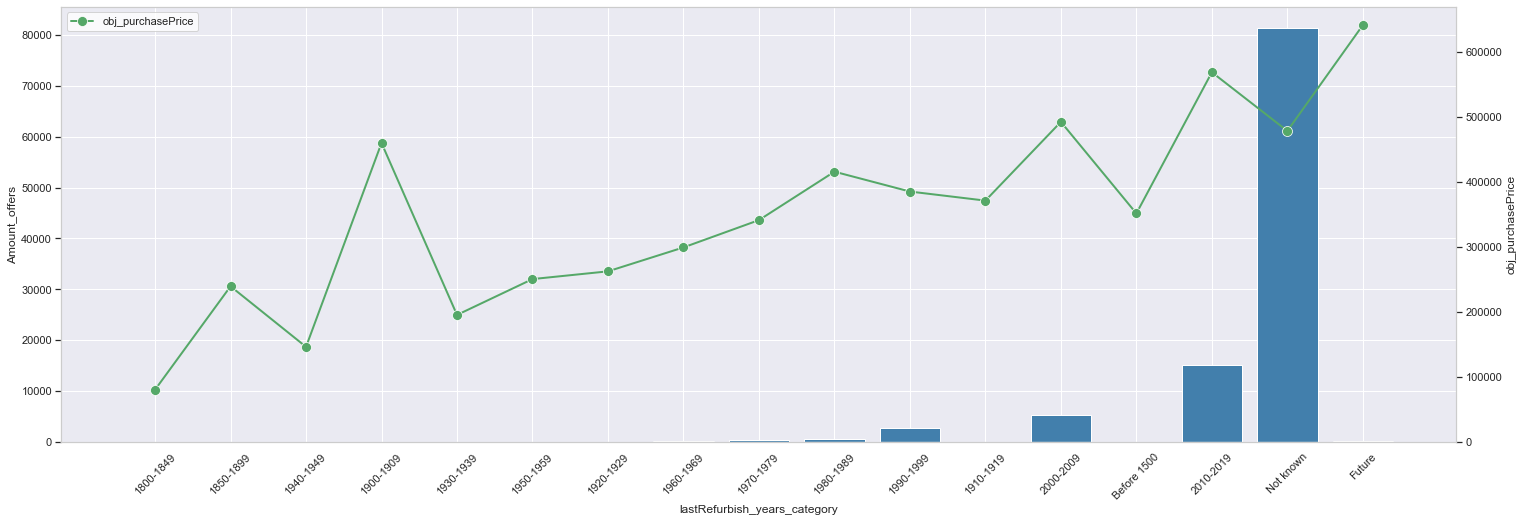

In [140]:
sns.set(font_scale = 1.2)
sns.set_context("talk")
sns.set(rc={"lines.linewidth": 2, 'lines.markersize': 10})
plt.figure(figsize=(25,8))
plt.xticks(rotation=45)
sns.set_style("whitegrid", {'axes.grid' : False})
grouped = grouped.sort_values('obj_yearConstructed')
ax= sns.barplot(x = 'lastRefurbish_years_category', y = 'Amount_offers',  label='Amount_offers', data=grouped, color = "#3182bd", ci=None)
ax2 = ax.twinx()
sns.lineplot(x = 'lastRefurbish_years_category', y = 'obj_purchasePrice', marker="o",  label='obj_purchasePrice', data=grouped, sort=False, color = "g",  ci=None)
ax.set(ylim=(0))
ax2.set(ylim=(0))
plt.legend(loc='upper left')
ax.xaxis.grid(True)
plt.show()

(1900, 2020)

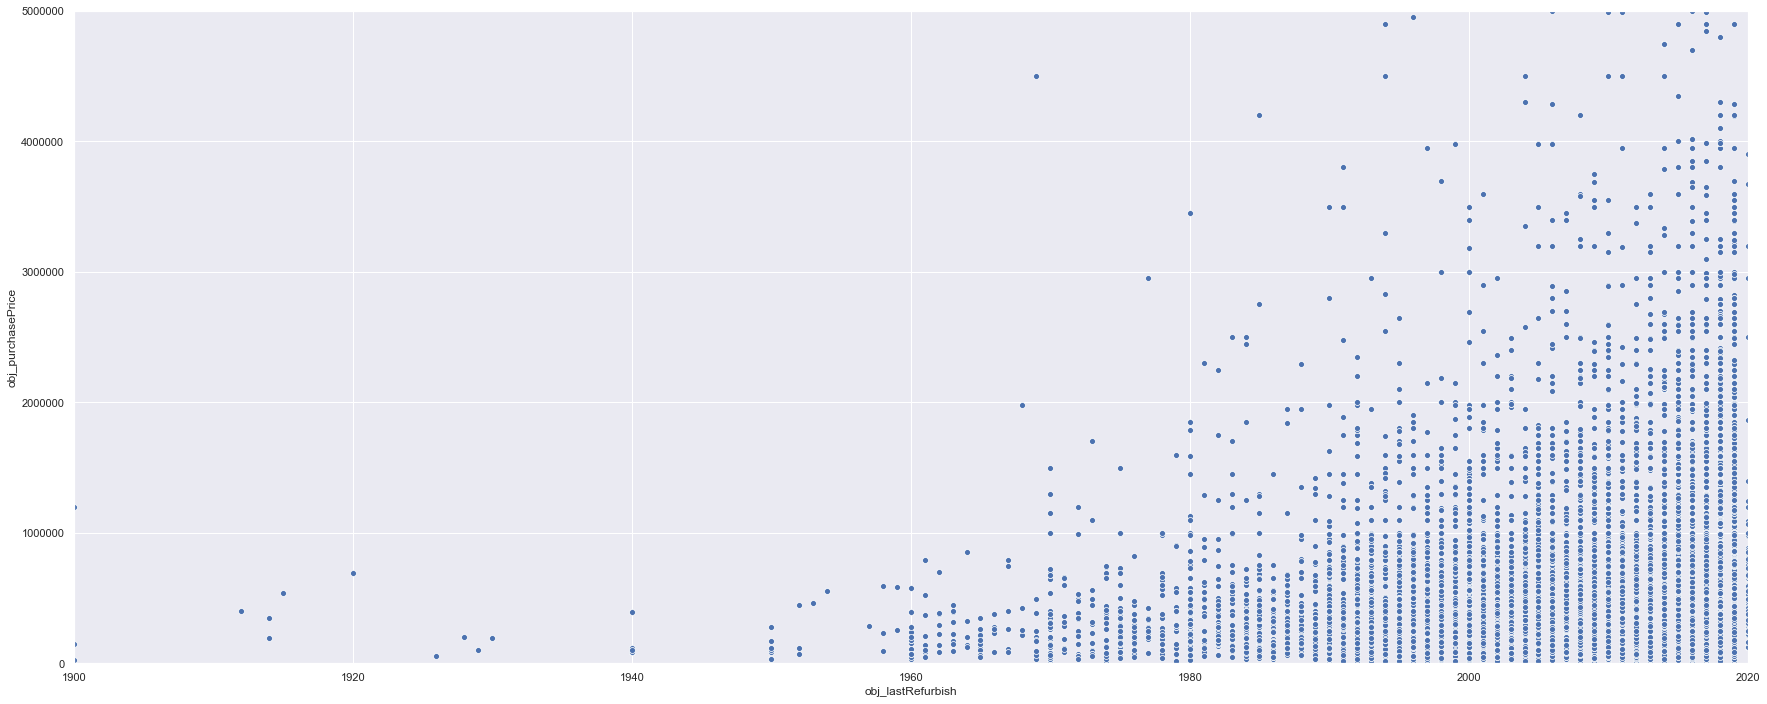

In [142]:
sns.set(font_scale = 1)
plt.figure(figsize=(30,12))
sns.scatterplot(x = 'obj_lastRefurbish', y = 'obj_purchasePrice', data=df_full)
plt.ylim(0, 5000000)
plt.xlim(1900, 2020)

In [143]:
grouped = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['lastRefurbish_years_category','geo_bln'], right_on=['lastRefurbish_years_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['lastRefurbish_years_category','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='lastRefurbish_years_category', values='Amount_offers')
grouped = grouped.reindex_axis(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  if __name__ == '__main__':


lastRefurbish_years_category,Before 1500,1500-1599,1600-1699,1700-1799,1800-1849,1850-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,Future,Not known
geo_bln,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,0.00,0.00,0.00,5.00,23.00,38.00,90.00,270.00,738.00,1850.00,14.00,8964.00
Bayern,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,2.00,3.00,12.00,35.00,87.00,235.00,608.00,1833.00,32.00,10965.00
Berlin,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,4.00,47.00,54.00,311.00,7.00,1476.00
Brandenburg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,4.00,12.00,147.00,229.00,574.00,22.00,4018.00
Bremen,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,7.00,13.00,28.00,117.00,0.00,615.00
Hamburg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,11.00,34.00,128.00,0.00,987.00
Hessen,2.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,13.00,34.00,83.00,206.00,442.00,1440.00,8.00,6521.00
Mecklenburg_Vorpommern,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,3.00,4.00,152.00,201.00,435.00,1.00,2201.00
Niedersachsen,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,6.00,34.00,69.00,212.00,544.00,1895.00,6.00,9758.00


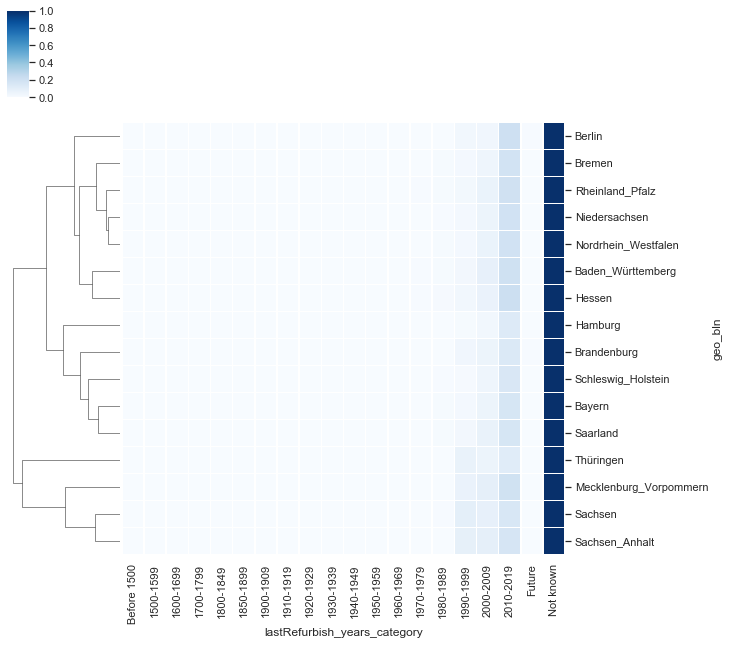

In [144]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

In [145]:
grouped = df_full.groupby(['lastRefurbish_years_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='lastRefurbish_years_category', values='obj_purchasePrice')
grouped = grouped.reindex_axis(['Before 1500','1500-1599', '1600-1699','1700-1799','1800-1849','1850-1899','1900-1909','1910-1919','1920-1929','1930-1939','1940-1949','1950-1959','1960-1969','1970-1979','1980-1989','1990-1999','2000-2009','2010-2019','Future','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


lastRefurbish_years_category,Before 1500,1500-1599,1600-1699,1700-1799,1800-1849,1850-1899,1900-1909,1910-1919,1920-1929,1930-1939,1940-1949,1950-1959,1960-1969,1970-1979,1980-1989,1990-1999,2000-2009,2010-2019,Future,Not known
geo_bln,,,,,,,,,,,,,,,,,,,,
Baden_Württemberg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,374500.00,0.00,0.00,0.00,362400.00,377260.87,414223.68,546961.11,539636.29,668332.52,695882.98,1204948.14,577656.31
Bayern,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100000.00,195000.00,255000.00,126333.33,207733.33,519425.71,579234.48,611276.59,639766.53,805931.89,954888.13,712422.26
Berlin,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,590000.00,4500000.00,0.00,3551000.00,851057.45,1067157.39,1243435.74,337390.00,1190329.57
Brandenburg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,80000.00,125125.00,155833.33,303607.28,353923.07,432937.71,279300.95,429177.16
Bremen,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,449000.00,680000.00,436714.29,368769.23,467321.43,387820.50,0.00,400288.46
Hamburg,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1980000.00,0.00,0.00,1028545.45,1095808.82,1100364.84,0.00,1003275.95
Hessen,550000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,286000.00,187207.69,428023.53,439581.93,438929.71,690537.12,693715.61,522699.38,547354.72
Mecklenburg_Vorpommern,0.00,0.00,0.00,0.00,0.00,0.00,0.00,195000.00,0.00,0.00,0.00,0.00,29000.00,265333.33,226250.00,255971.48,327073.00,352580.86,160000.00,317088.13
Niedersachsen,269000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,29000.00,225750.00,247000.00,293910.70,317291.98,336153.74,378000.75,827083.33,340745.08


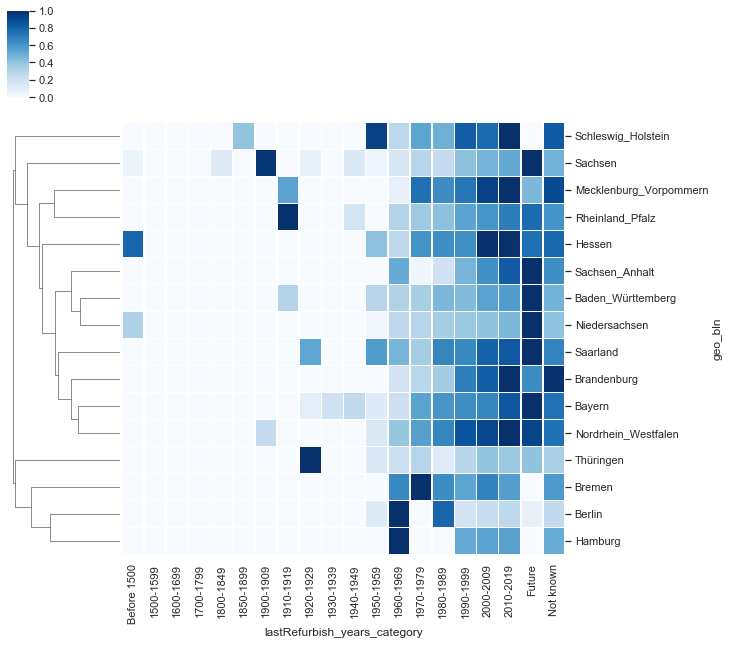

In [146]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

In [242]:
df_full['obj_pricetrend'] = pd.to_numeric(df_full['obj_pricetrend'],errors='coerce')
df_full['obj_pricetrend'].head()

In [249]:
#Transform method taking points as param
def transform_trend(pricetrend):
    if pricetrend < 2:
        return "Below 2"
    elif pricetrend >= 2 and pricetrend < 5:
        return "2-4" 
    elif pricetrend >= 5 and pricetrend < 8:
        return "5-7"  
    elif pricetrend >= 8 and pricetrend < 11:
        return "8-10" 
    elif pricetrend >= 11 and pricetrend < 14:
        return "11-13" 
    elif pricetrend >= 14 and pricetrend < 17:
        return "14-16" 
    elif pricetrend >= 17 and pricetrend < 20:
        return "17-19" 
    elif pricetrend > 19:
        return "Above or erqual 20"
    else:
        return "Not known"

#Applying transform method and assigning result to new column "points_simplified"
df_full = df_full.assign(obj_pricetrend_category = df_full['obj_pricetrend'].apply(transform_trend))
df_full[['obj_pricetrend','obj_pricetrend_category']].head(10)

,obj_pricetrend,obj_pricetrend_category
0,8.28,8-10
1,7.33,5-7
2,5.64,5-7
3,6.68,5-7
4,1.85,Below 2
5,5.95,5-7
6,nan,Not known
7,9.36,8-10
8,0.78,Below 2
9,2.03,2-4


In [250]:
grouped = df_full.groupby('obj_pricetrend_category').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_pricetrend_category').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_pricetrend_category','URL']], left_on='obj_pricetrend_category', right_on='obj_pricetrend_category')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_pricetrend_category', ascending=False).reset_index(drop="True")
grouped

,obj_pricetrend_category,obj_pricetrend,obj_lastRefurbish,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,...,obj_thermalChar,obj_usableArea,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,Not known,nan,2007.41,1964.88,350098.83,218.25,2032.95,2.72,6.86,2.05,...,150.24,173.09,341.16,4.49,2698.43,2754.17,1140.15,61.46,407.07,18777
1,Below 2,-0.23,2007.99,1947.76,303703.41,222.86,1465.56,8.70,7.50,2.22,...,169.50,174.38,319.62,4.26,2511.33,1716.65,690.96,65.77,380.79,5890
2,Above or erqual 20,21.45,2007.94,1969.30,355041.62,189.02,775.59,1.89,6.53,2.24,...,154.20,125.54,346.68,3.71,2742.62,2058.15,656.46,66.43,798.61,69
3,8-10,9.25,2010.21,1969.68,569062.55,224.58,1230.22,2.46,6.77,2.29,...,152.07,124.67,362.02,4.70,2827.63,3056.18,2156.86,70.11,773.92,23653
4,5-7,6.54,2009.49,1968.38,522016.75,207.74,1327.37,2.45,6.72,2.26,...,154.81,125.74,362.14,4.49,2837.86,2966.88,1813.24,72.21,831.72,33137
5,2-4,3.86,2008.96,1959.69,434466.05,224.08,1400.91,2.55,6.99,2.25,...,161.33,139.35,335.72,4.28,2634.14,2470.78,3323.05,69.83,565.53,13770
6,17-19,18.02,2009.44,1962.14,575766.04,207.15,853.70,2.16,7.05,2.24,...,127.34,143.21,356.62,5.10,2757.09,2707.44,1096.03,79.93,905.11,151
7,14-16,15.07,2009.62,1972.62,623127.32,210.95,1282.18,2.30,6.77,2.25,...,134.78,159.14,349.76,4.19,2729.82,3214.48,1732.71,75.63,958.00,2139
8,11-13,12.30,2010.16,1970.68,626943.01,208.02,1527.99,2.37,6.98,2.32,...,144.91,129.12,347.03,4.32,2707.23,3335.43,1628.86,71.82,949.81,8002


In [251]:
grouped = df_full.groupby(['obj_pricetrend_category','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_pricetrend_category','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_pricetrend_category','geo_bln'], right_on=['obj_pricetrend_category','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_pricetrend_category','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_pricetrend_category', values='Amount_offers')
grouped = grouped.reindex_axis(['Below 2','2-4','5-7','8-10','11-13','14-16','17-19','Above or erqual 20','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  if __name__ == '__main__':


obj_pricetrend_category,Below 2,2-4,5-7,8-10,11-13,14-16,17-19,Above or erqual 20,Not known
geo_bln,,,,,,,,,
Baden_Württemberg,150.00,1200.00,2749.00,4666.00,2108.00,248.00,5.00,0.00,868.00
Bayern,655.00,1804.00,4637.00,3780.00,922.00,150.00,11.00,0.00,1855.00
Berlin,0.00,0.00,0.00,16.00,1312.00,263.00,0.00,0.00,310.00
Brandenburg,147.00,325.00,319.00,1034.00,1283.00,665.00,26.00,48.00,1160.00
Bremen,0.00,93.00,614.00,6.00,0.00,0.00,0.00,0.00,69.00
Hamburg,5.00,59.00,994.00,63.00,5.00,0.00,0.00,0.00,35.00
Hessen,1052.00,942.00,2809.00,2934.00,281.00,9.00,0.00,0.00,723.00
Mecklenburg_Vorpommern,166.00,190.00,347.00,691.00,137.00,6.00,5.00,0.00,1457.00
Niedersachsen,245.00,1844.00,4644.00,2937.00,832.00,139.00,0.00,0.00,1885.00


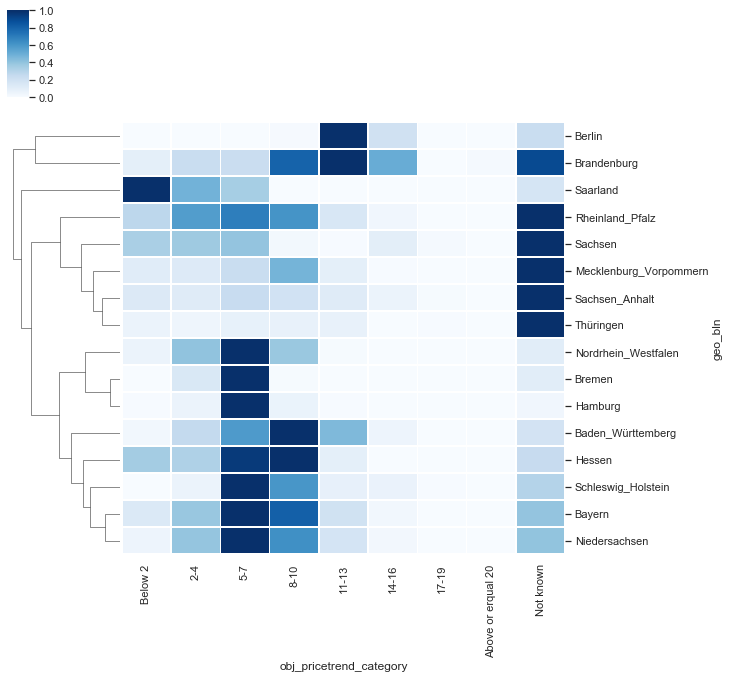

In [252]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

In [253]:
grouped = df_full.groupby(['obj_pricetrend_category','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_pricetrend_category', values='obj_purchasePrice')
grouped = grouped.reindex_axis(['Below 2','2-4','5-7','8-10','11-13','14-16','17-19','Above or erqual 20','Not known'], axis=1)
grouped.fillna(0, inplace=True)
grouped

C:\Users\d6002091\Downloads\Programs\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  """


obj_pricetrend_category,Below 2,2-4,5-7,8-10,11-13,14-16,17-19,Above or erqual 20,Not known
geo_bln,,,,,,,,,
Baden_Württemberg,413765.81,506108.55,645374.56,602231.65,651053.94,732462.52,1494547.16,0.00,440567.18
Bayern,379814.33,844359.35,818513.17,705100.67,712836.11,628232.43,618545.45,0.00,503188.80
Berlin,0.00,0.00,0.00,456175.00,1028004.89,889815.47,0.00,0.00,2170497.45
Brandenburg,240669.51,392309.64,353719.30,464992.20,466283.23,612167.99,863515.00,370493.88,263041.56
Bremen,0.00,297779.42,410422.95,515650.00,0.00,0.00,0.00,0.00,446816.33
Hamburg,5176000.00,579435.75,913512.28,1450946.78,1323000.00,0.00,0.00,0.00,3300257.14
Hessen,226824.94,367664.11,568172.48,775815.19,851990.54,1900333.33,0.00,0.00,427685.88
Mecklenburg_Vorpommern,242509.80,283000.85,345583.42,375090.80,476259.73,362333.33,328420.00,0.00,285396.25
Niedersachsen,297246.82,333606.39,341663.33,391217.01,347980.01,324966.20,0.00,0.00,301514.11


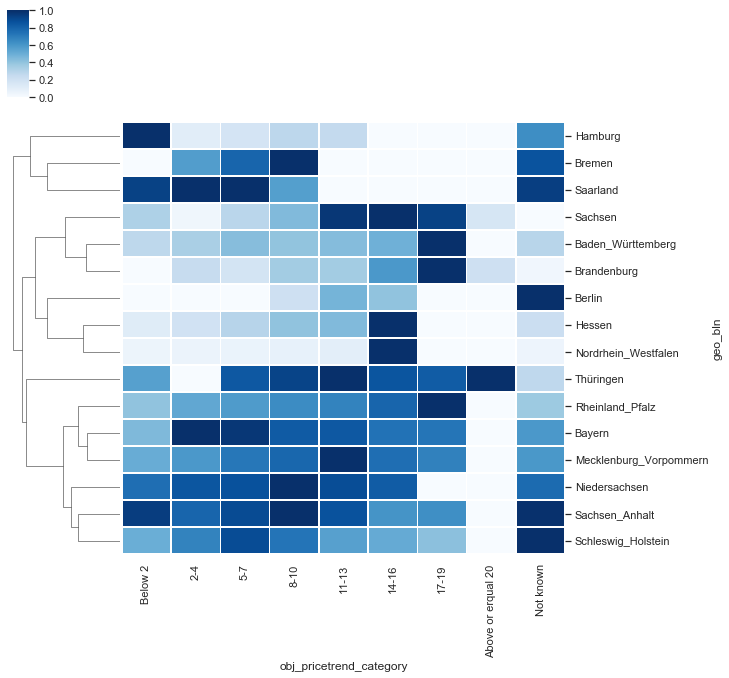

In [254]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0, col_cluster=False)

## Expose features

In [255]:
grouped = df_full.groupby('ga_cd_via').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('ga_cd_via').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['ga_cd_via','URL']], left_on='ga_cd_via', right_on='ga_cd_via')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('ga_cd_via', ascending=False).reset_index(drop="True")
grouped

,ga_cd_via,obj_pricetrend,obj_lastRefurbish,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,...,obj_thermalChar,obj_usableArea,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,top,7.20,2009.10,1965.48,490829.04,208.49,1499.84,3.21,6.94,2.25,...,156.50,134.68,350.81,4.44,2751.42,3003.61,2025.44,69.49,702.44,45055
1,standard,7.06,2009.17,1965.54,449133.68,222.41,1434.57,2.48,6.74,2.19,...,154.52,143.66,343.07,4.44,2692.65,2557.35,1302.93,68.96,652.10,52070
2,schaufenster,7.72,2008.10,1982.68,1076118.58,243.02,1187.80,2.26,6.46,2.53,...,116.42,133.22,452.80,4.66,3540.96,5761.69,3486.27,76.05,1284.76,848
3,premium,7.61,2010.40,1971.24,676452.49,219.55,1451.08,2.81,7.20,2.43,...,141.40,120.39,397.15,4.97,3097.28,3569.38,4878.81,71.35,879.83,7615


In [256]:
grouped = df_full.groupby(['ga_cd_via','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['ga_cd_via','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['ga_cd_via','geo_bln'], right_on=['ga_cd_via','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['ga_cd_via','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='ga_cd_via', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

ga_cd_via,premium,schaufenster,standard,top
geo_bln,,,,
Baden_Württemberg,900,92,5934,5068
Bayern,966,193,7196,5459
Berlin,209,62,750,880
Brandenburg,361,42,2463,2141
Bremen,71,12,380,319
Hamburg,157,26,527,451
Hessen,807,99,3995,3849
Mecklenburg_Vorpommern,210,21,1398,1370
Niedersachsen,776,47,6545,5158


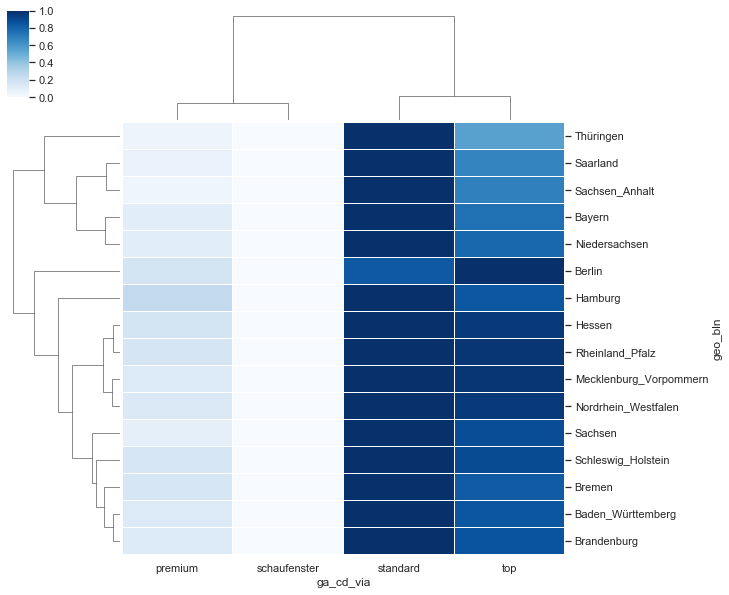

In [258]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [259]:
grouped = df_full.groupby(['ga_cd_via','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='ga_cd_via', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

ga_cd_via,premium,schaufenster,standard,top
geo_bln,,,,
Baden_Württemberg,729868.05,998271.54,579853.05,593514.19
Bayern,1102810.99,1759369.53,626907.21,734258.97
Berlin,1143855.82,1609692.47,1250617.64,1120553.25
Brandenburg,552887.55,996817.21,390822.18,421840.30
Bremen,421217.21,410693.33,415567.39,378893.58
Hamburg,1023254.96,1037565.77,1011329.49,1022246.53
Hessen,775799.50,784454.67,533549.89,568372.01
Mecklenburg_Vorpommern,453738.90,453144.71,312670.83,303724.79
Niedersachsen,407260.55,734509.32,326134.24,357042.17


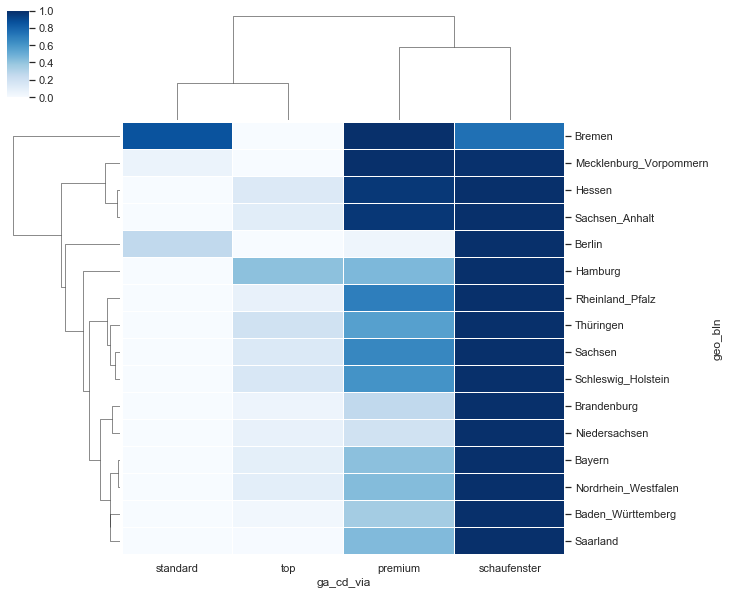

In [260]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [262]:
grouped = df_full.groupby('obj_ExclusiveExpose').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_ExclusiveExpose').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_ExclusiveExpose','URL']], left_on='obj_ExclusiveExpose', right_on='obj_ExclusiveExpose')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_ExclusiveExpose', ascending=False).reset_index(drop="True")
grouped

,obj_ExclusiveExpose,obj_pricetrend,obj_lastRefurbish,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,...,obj_thermalChar,obj_usableArea,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,true,7.28,2008.09,1974.07,447747.56,208.13,1291.28,2.56,6.13,2.05,...,152.31,121.70,371.77,4.00,2962.07,3112.59,1494.52,68.71,592.06,29927
1,false,7.13,2009.57,1963.26,504442.00,219.70,1527.37,2.92,7.14,2.31,...,154.67,142.64,342.89,4.66,2670.43,2742.10,2045.18,69.72,735.41,75505
2,None,6.94,2008.62,1965.79,492263.69,227.78,2327.17,2.79,8.01,2.10,...,128.85,162.16,394.95,3.93,3099.19,2352.52,860.11,75.27,967.51,156


In [263]:
grouped = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_ExclusiveExpose','geo_bln'], right_on=['obj_ExclusiveExpose','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_ExclusiveExpose','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_ExclusiveExpose', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_ExclusiveExpose,None,false,true
geo_bln,,,
Baden_Württemberg,21.00,8269.00,3704.00
Bayern,9.00,10084.00,3721.00
Berlin,1.00,1404.00,496.00
Brandenburg,5.00,3213.00,1789.00
Bremen,0.00,544.00,238.00
Hamburg,0.00,841.00,320.00
Hessen,8.00,6591.00,2151.00
Mecklenburg_Vorpommern,5.00,2273.00,721.00
Niedersachsen,14.00,9057.00,3455.00


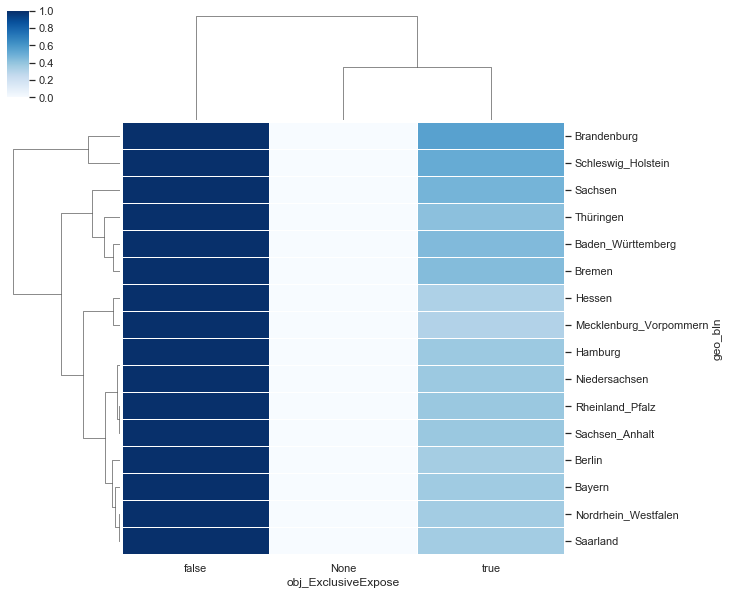

In [264]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [265]:
grouped = df_full.groupby(['obj_ExclusiveExpose','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_ExclusiveExpose', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_ExclusiveExpose,None,false,true
geo_bln,,,
Baden_Württemberg,664563.33,642169.37,505789.88
Bayern,659766.67,720655.05,712548.88
Berlin,920000.00,1288502.01,913185.60
Brandenburg,399200.00,430801.81,403047.32
Bremen,0.00,411869.11,376305.08
Hamburg,0.00,1062425.63,900411.28
Hessen,386652.50,609013.45,467608.56
Mecklenburg_Vorpommern,282779.80,331107.95,282934.43
Niedersachsen,331274.14,341214.66,356500.51


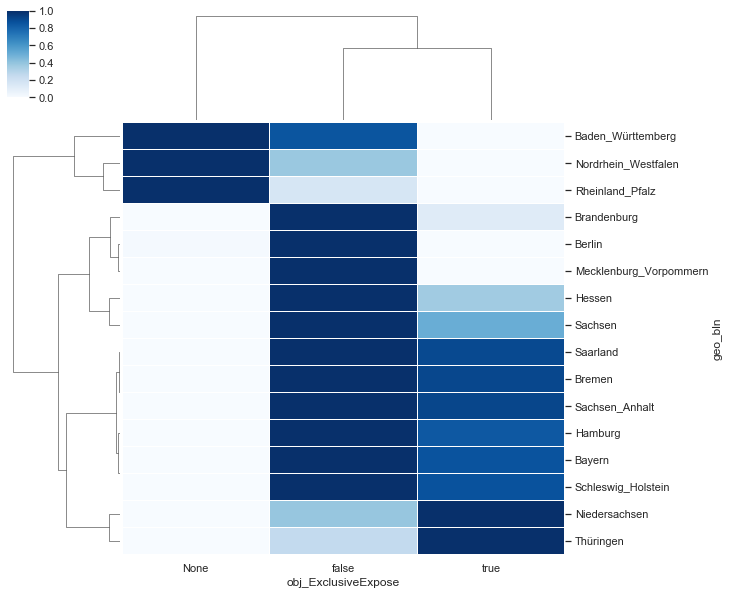

In [266]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=0)

In [267]:
grouped = df_full.groupby('obj_courtage').mean()
grouped = grouped[['obj_pricetrend','obj_lastRefurbish','obj_yearConstructed','obj_purchasePrice','obj_livingSpace','obj_lotArea','obj_noParkSpaces','obj_noRooms','obj_numberOfFloors','obj_picturecount','obj_pricetrendrent','obj_thermalChar','obj_usableArea','word_count','word_count_upper','beschreibung_length','price_per_m²_living','price_per_m²_property','obj_telekomDownloadSpeed','bev_pro_km2']]
grouped_count = df_full.groupby('obj_courtage').count().reset_index()
grouped = pd.merge(grouped, grouped_count[['obj_courtage','URL']], left_on='obj_courtage', right_on='obj_courtage')
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped = grouped.sort_values('obj_courtage', ascending=False).reset_index(drop="True")
grouped

,obj_courtage,obj_pricetrend,obj_lastRefurbish,obj_yearConstructed,obj_purchasePrice,obj_livingSpace,obj_lotArea,obj_noParkSpaces,obj_noRooms,obj_numberOfFloors,...,obj_thermalChar,obj_usableArea,word_count,word_count_upper,beschreibung_length,price_per_m²_living,price_per_m²_property,obj_telekomDownloadSpeed,bev_pro_km2,Amount_offers
0,True,7.20,2009.01,1958.65,528083.88,224.59,1641.22,3.03,7.28,2.29,...,163.91,147.37,365.77,4.27,2824.89,2974.57,1711.48,69.72,731.81,68880
1,False,7.09,2010.11,1981.54,413355.12,186.80,1134.70,2.13,6.10,2.15,...,103.37,120.31,321.83,4.89,2603.40,2557.93,2130.47,68.67,633.41,34933


In [268]:
grouped = df_full.groupby(['obj_courtage','geo_bln'])['obj_purchasePrice'].mean()
grouped_count = df_full.groupby(['obj_courtage','geo_bln'])['URL'].count()
grouped = pd.merge(grouped, grouped_count, left_on=['obj_courtage','geo_bln'], right_on=['obj_courtage','geo_bln'])
grouped.rename( columns={'URL':'Amount_offers'}, inplace=True )
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped = grouped[['obj_courtage','geo_bln','Amount_offers']]
grouped=grouped.pivot(index='geo_bln', columns='obj_courtage', values='Amount_offers')
grouped.fillna(0, inplace=True)
grouped

obj_courtage,False,True
geo_bln,,
Baden_Württemberg,3809,7822
Bayern,4547,9051
Berlin,417,1469
Brandenburg,1824,3153
Bremen,184,598
Hamburg,333,797
Hessen,3119,5477
Mecklenburg_Vorpommern,814,2158
Niedersachsen,3561,8826


In [274]:
grouped = df_full.groupby(['obj_courtage','geo_bln'])['obj_purchasePrice'].mean()
grouped= pd.DataFrame(grouped) 
grouped.reset_index(inplace=True)
grouped=grouped.pivot(index='geo_bln', columns='obj_courtage', values='obj_purchasePrice')
grouped.fillna(0, inplace=True)
grouped

obj_courtage,False,True
geo_bln,,
Baden_Württemberg,523335.71,643159.53
Bayern,640738.89,762885.55
Berlin,829399.96,1297613.37
Brandenburg,337941.15,466514.14
Bremen,380062.66,407501.46
Hamburg,771320.46,1120868.30
Hessen,480949.50,632276.23
Mecklenburg_Vorpommern,259866.13,342281.73
Niedersachsen,318736.67,355857.55


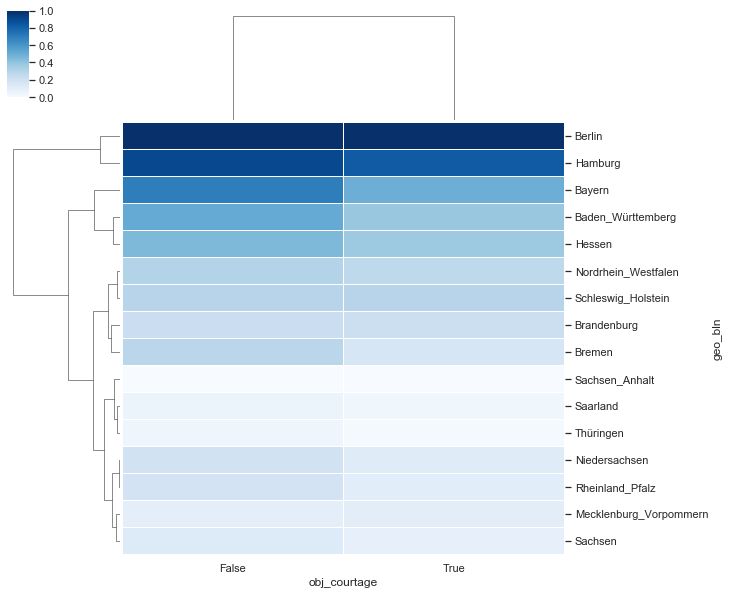

In [275]:
sns.clustermap(grouped, cmap="Blues", linewidth=.5, standard_scale=1)